In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

### DOMAIN: 
Semiconductor manufacturing process
#### CONTEXT: 
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of 
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

#### DATA DESCRIPTION: 
signal-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features. 
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
#### PROJECT OBJECTIVE: 
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the 
features are required to build the model or not.

#### Q1. Import and understand the data. [5 Marks]

A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]

B. Print 5 point summary and share at least 2 observations. [3 Marks]

In [250]:
# Q1 A: Import ‘signal-data.csv’ as DataFrame
signal_df= pd.read_csv('signal-data.csv')
signal_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [251]:
signal_df.shape

(1567, 592)

The data has 1567 rows and 592 columns

In [252]:
# Q1 B: Print 5 point summary and share at least 2 observations.
signal_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


The column 4 looks like heavily skewed as the meadian is 1.31, mean values is 4.19, 75% is 1.52 & max is 1114.53.

Columns 581 also looks skewed with median as 72.28, 75% as 116.53 & max as 737.30. This column has alot of missing values (618 values out of 1567 ~ 39.4% of column 581 has values, rest all are blanks).

Columns 585 & 589 are also skewed as in both the caloumns steep increase from 75% to max can be noticed.

Column 5 has only values as 100 and few missing values.

We can notice that data has many missing values as well (few columns don't have 1567 values). 

#### Q2. Data cleansing: [15 Marks]

A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]

B. Identify and drop the features which are having same value for all the rows. [3 Marks]

C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]

D. Check for multi-collinearity in the data and take necessary action. [3 Marks]

E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

In [253]:
# Q2 A: Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.
#First lets check how many missing values we have in the data (20% of 1567 is around 313.4, hence we need to remove the 
# features where missing values are 313 or more, or 0.8 * len of dataframe)
signal_df.isnull().sum().sort_values(ascending=0)

158          1429
292          1429
293          1429
157          1429
85           1341
             ... 
386             0
361             0
360             0
359             0
Pass/Fail       0
Length: 592, dtype: int64

In [254]:
signal_df.isnull().sum().sort_values(ascending=0).head(35)

158    1429
292    1429
293    1429
157    1429
85     1341
492    1341
220    1341
358    1341
517    1018
245    1018
246    1018
518    1018
382    1018
516    1018
109    1018
111    1018
244    1018
110    1018
384    1018
383    1018
579     949
581     949
580     949
578     949
346     794
345     794
73      794
72      794
519     715
385     715
112     715
247     715
568     273
566     273
565     273
dtype: int64

We can notice that there are around 32 columns where we have more than 20% of missing values.

In [255]:
#Creating a for loop to check if the column has more than or equal to 20% of missing value & drop them if its =>20%

for i in signal_df.columns:
    if signal_df[i].isnull().sum() >= len(signal_df)*.2:   #0.2 * len of dataframe will give 20% of total rows 
        signal_df = signal_df.drop(i,axis=1)


In [256]:
signal_df.shape

(1567, 560)

32 columns are dropped, hence we have 560 columns now.

In [257]:
#Imputing the missing values with mean in rest of the columns
signal_df= signal_df.fillna(signal_df.mean())

In [258]:
signal_df.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 560, dtype: int64

We can see there is no Null values now in the data and the data has 560 columns & 1567 rows.

In [259]:
# Q2 B: Identify and drop the features which are having same value for all the rows.
#First lets check the no of unique values in all the columns.
signal_df.nunique().sort_values()

259       1
260       1
261       1
262       1
263       1
       ... 
423    1564
460    1565
250    1566
296    1566
115    1567
Length: 560, dtype: int64

In [260]:
signal_df.nunique().sort_values().head(120)

259          1
260          1
261          1
262          1
263          1
            ..
42           1
Pass/Fail    2
342          3
209          3
206          3
Length: 120, dtype: int64

We can see that there are 116 columns that have single values. Lets drop these 116 columns.

In [261]:
#Creating for loop to check if the no unique values in the column is equal to 1 or not and drop if its 1.
for j in signal_df.columns:
    if signal_df[j].nunique() == 1:
        signal_df = signal_df.drop(j,axis=1)
        
signal_df.shape

(1567, 444)

Dropped 116 columns and now data has 444 columns with 1567 rows.

In [15]:
# Q2 C: Drop other features if required using relevant functional knowledge.

Though, I think by dropping columns we may loose some information but to avoid Curse of dimensionality, we need to take few steps:

We will check the collinearity between the columns and drop the columns which has high collinearity but as its part of Q2 D, hence not taking action here.

We will do PCA in further question Q5 D, hence not taking action here.

We have already dropped the columns where standard deviation is zero (all values are same).

I am dropping the column 'Time' as I think its not a driving factor in our use case.

In [262]:
signal_df = signal_df.drop('Time',axis=1)
signal_df.shape

(1567, 443)

<Axes: >

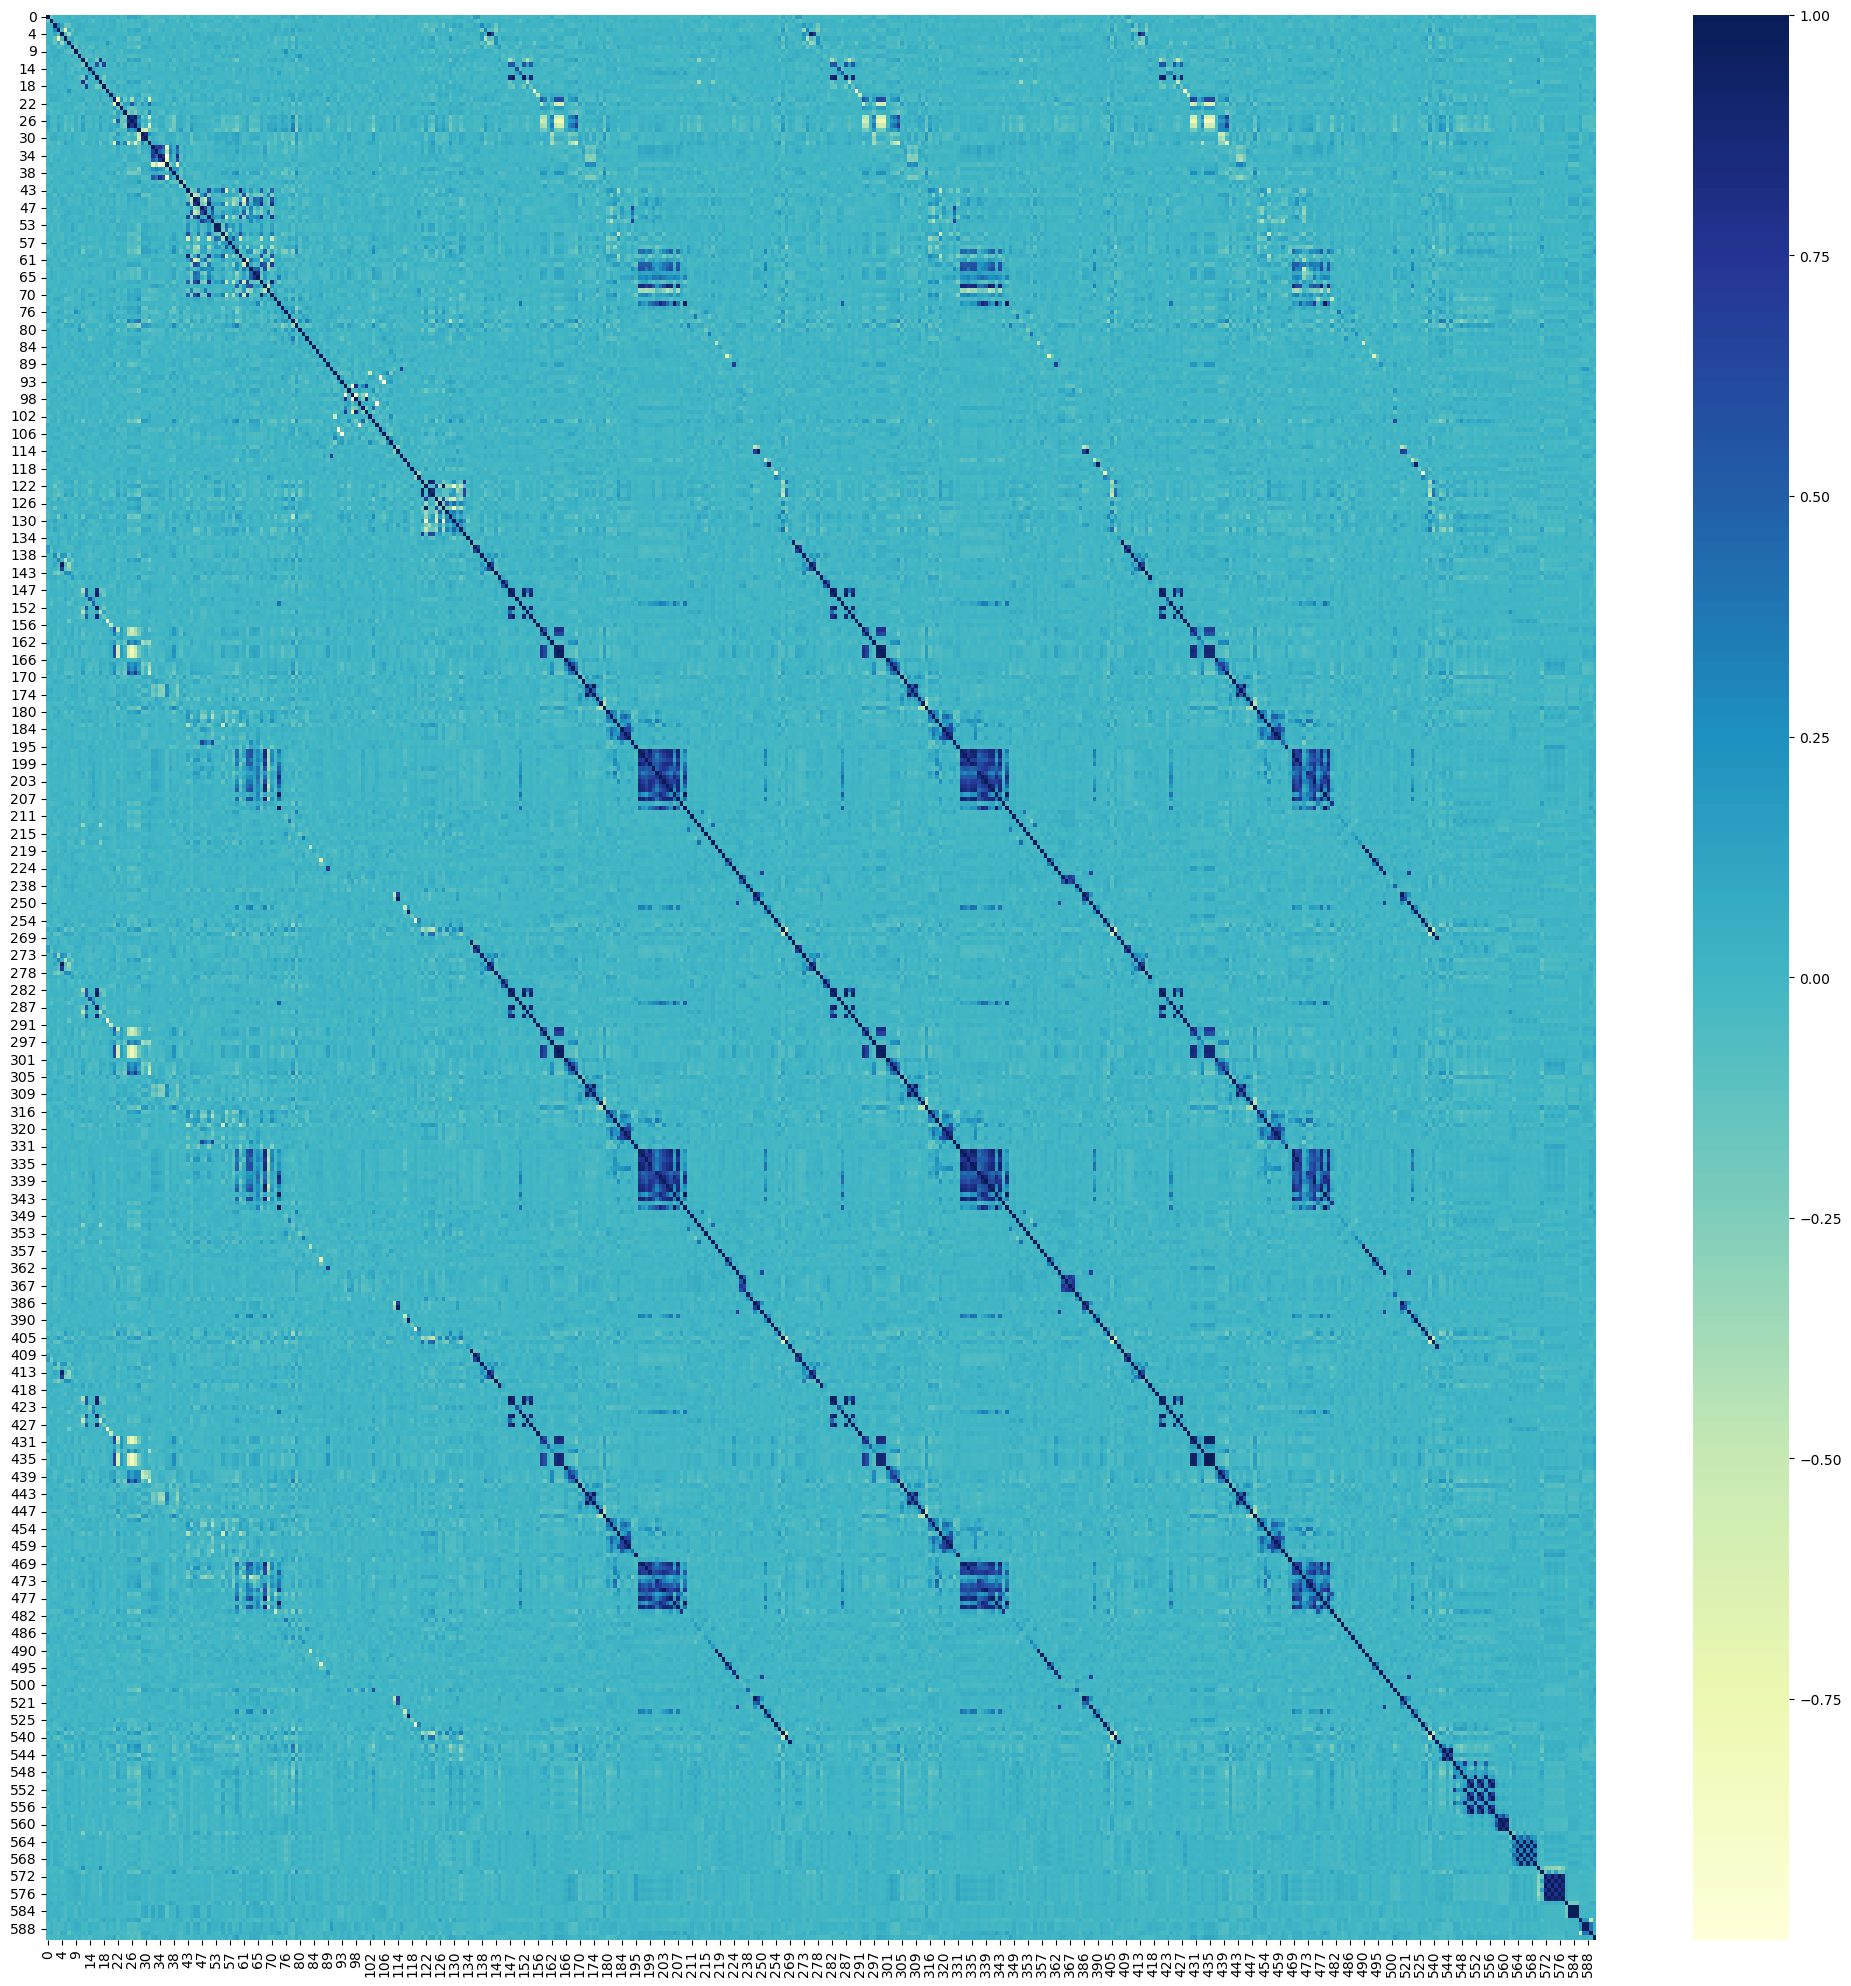

In [263]:
# Q2 D: Check for multi-collinearity in the data and take necessary action.
#Plotting a heatmap to check the collinearity
plt.figure(figsize=(25,25))
sns.heatmap(signal_df.corr(), cmap= 'YlGnBu')

We can see that few columns has quite high collinearity, darkest(positive correlation) & lightest(negative correlation).

Let's check them using a threshold. I am setting a thershold of 0.8 & -0.8, the columns having collinearity above or equal to 0.8 or lower than or equal to -0.8 are highly collinear.

<Axes: >

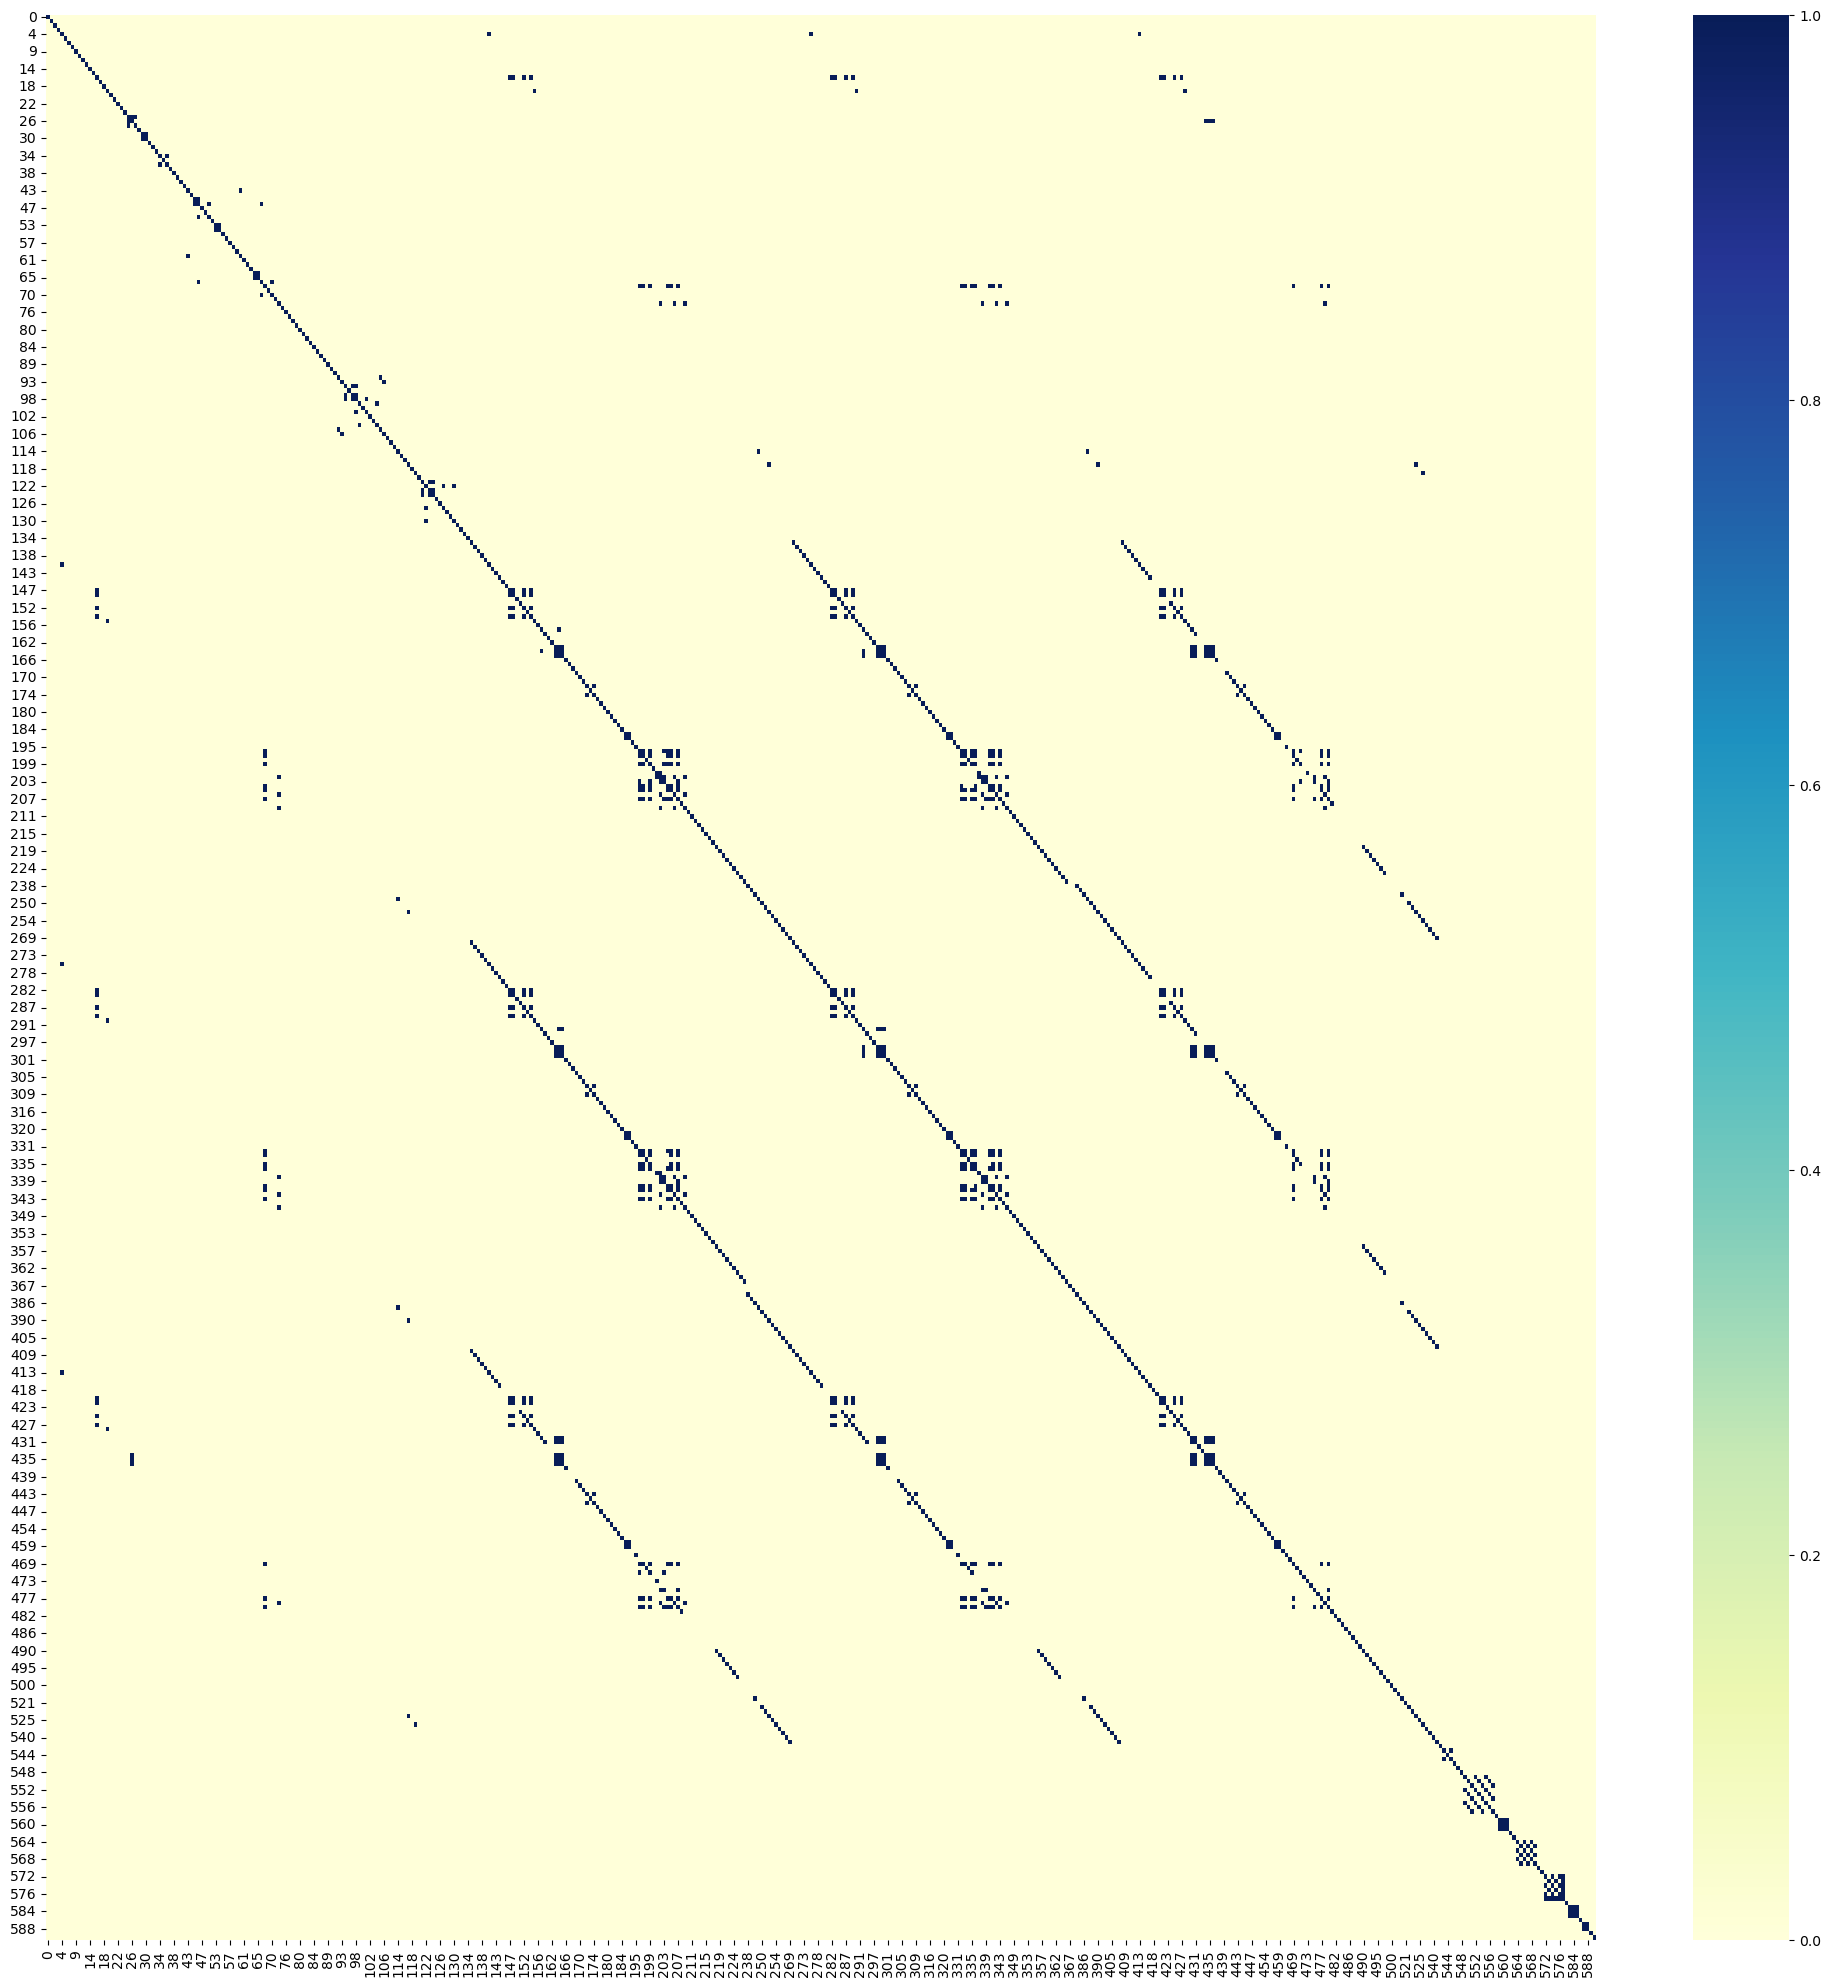

In [264]:
plt.figure(figsize=(25,25))
sns.heatmap(((signal_df.corr()> 0.8) | (signal_df.corr() < -0.8)), cmap= 'YlGnBu')

In [265]:
#Lets get only the high correalation columns (Positive & Negative)
#pd.set_option('display.max_rows', None)
cor= signal_df.corr()
cor.loc[:,:] = np.triu(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.8) | (cor< -0.8)]

0          0            1.000000
1          1            1.000000
2          2            1.000000
3          3            1.000000
4          4            1.000000
                          ...   
587        588          0.974276
588        587          0.974276
           588          1.000000
589        589          1.000000
Pass/Fail  Pass/Fail    1.000000
Length: 1066, dtype: float64

We can see there are multiple columns which have high collinearity either positive or negative. We can't drop these many columns by manually passing the names in drop function, hence we need to find an approach using for loop which can run in iterations and delete any one column from the pair of highly correlated columns.

In [266]:
#Converting all the correlations to positive correlation
signal_corr_df= signal_df.corr().abs()
masked_df = np.triu(np.ones_like(signal_corr_df,dtype=bool))
masked_df

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [267]:
masked_df = signal_corr_df.mask(masked_df)
masked_df

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.143840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.004756,0.005767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.007613,0.007568,0.298935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.011014,0.001636,0.095891,0.058483,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,0.009403,0.025495,0.034711,0.043929,0.041209,0.058113,0.010433,0.033738,0.000327,...,0.002684,0.016726,0.002257,0.001605,0.002743,NaN,NaN,NaN,NaN,NaN
587,0.025880,0.017266,0.029345,0.039132,0.031005,0.034027,0.021426,0.022845,0.059301,0.046965,...,0.009405,0.024473,0.002649,0.002498,0.002930,0.167913,NaN,NaN,NaN,NaN
588,0.028166,0.010118,0.030818,0.033645,0.026100,0.032227,0.020893,0.026250,0.060758,0.046048,...,0.015596,0.020705,0.002260,0.001957,0.002530,0.164238,0.974276,NaN,NaN,NaN
589,0.004174,0.044797,0.032890,0.080341,0.050910,0.043777,0.107804,0.022770,0.004880,0.008393,...,0.024766,0.041486,0.003008,0.003295,0.003800,0.486559,0.390813,0.389211,NaN,NaN


In [268]:
cols_to_drop= [k for k in masked_df.columns if any(masked_df[k] >=0.8)]
print(cols_to_drop)

['4', '16', '19', '25', '26', '29', '34', '43', '45', '46', '53', '64', '66', '67', '74', '92', '93', '94', '96', '98', '99', '114', '117', '119', '121', '122', '123', '135', '136', '137', '138', '139', '140', '142', '143', '144', '145', '146', '147', '148', '150', '151', '152', '153', '154', '155', '156', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '180', '181', '182', '183', '184', '185', '187', '188', '195', '196', '197', '198', '199', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '221', '222', '223', '224', '225', '227', '228', '238', '239', '248', '249', '250', '251', '252', '253', '254', '255', '267', '268', '269', '270', '271', '272', '273', '274', '275', '277', '278', '279', '282', '283', '286', '287', '288', '289', '290', '291', '294', '295', '298', '299', '300', '301', '304', '305', '306', '307', '308',

In [269]:
signal_df = signal_df.drop(cols_to_drop,axis=1)
signal_df.shape

(1567, 223)

We can see that 220 columns are dropped from the data that will help reducing Multicollinearity.

I deleted only the columns which have collinearity more than 0.8 so that we don't loose any information and drop only the highly correlated columns.

In [270]:
#We can quickly cross verify if there are still any high correlating columns present in the data or not
cor= signal_df.corr()
cor.loc[:,:] = np.triu(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.8) | (cor< -0.8)]

0          0            1.0
1          1            1.0
2          2            1.0
3          3            1.0
6          6            1.0
                       ... 
585        585          1.0
586        586          1.0
588        588          1.0
589        589          1.0
Pass/Fail  Pass/Fail    1.0
Length: 223, dtype: float64

This shows no such high correlating columns are present now, only the column to themselves have value as 1.

In [ ]:
# Q2 E: Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

I have already modified the data wherever necessary, below are my thoughts on my assumptions:

Firstly, I checked the columns which has more than or equal to 20% of values as Nulls and imputed the rest with mean value.

In order to avoid noise, we need to drop few columns but sometimes in doing so we can loose useful information. Hence, we should  perform PCA so that we don't loose any information. I will perform this step in Q5 D.

But even before doing so, here I thought of dropping the columns which had same values as it won't have any affect on the target 'Pass/Fail' (standard deviation is zero). 

Further to avoid Curse of dimensionality, I tried checking the multicollinearity between the features and drop the columns which has high collinearity. I dropped 220 columns from the table that will help to improve model performance and decrease the computational time too.

I also dropped the column 'Time' as I think its not a driving factor in our use case.

#### Q3. Data analysis & visualisation: [5 Marks]

A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]

B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]

In [24]:
# Q3 A: Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

As there are too many features still in the data, it won't be feasible to perform univariate analysis on each feature. hence I will pick few of the fetaures.

<Axes: ylabel='Pass/Fail'>

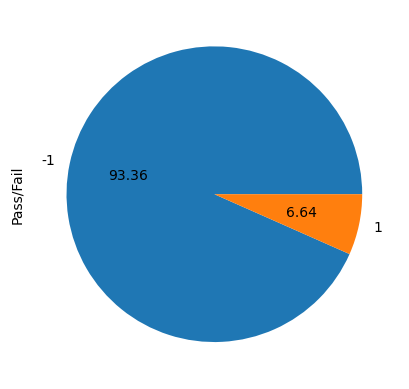

In [271]:
#Checking if the target valriable 'Pass/Fail' is balanced or not
signal_df['Pass/Fail'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')

The chart show that the target column is highly imbalanced with 93.36% of Pass (-1) values & 6.64% of Fail (1) values. 

In [272]:
#lets take a look at other columns but before that lets run a 5 point summary on the columns.
#Sorted the summary on standard deviation and lets take a closer look at the columns which has highest standard deviation
signal_df.describe().transpose().sort_values(by= 'std',ascending= False)

,count,mean,std,min,25%,50%,75%,max
297,1567.0,2342.826978,3224.863024,0.0000,211.25455,820.8209,3188.19075,18520.4683
24,1567.0,-298.598136,2900.835956,-14804.5000,-1474.37500,-80.5000,1376.25000,14106.0000
296,1567.0,1879.228369,1973.849716,0.0000,603.29080,1202.5774,2337.95065,15559.9525
23,1567.0,-3806.299734,1379.280537,-9986.7500,-4370.62500,-3819.7500,-3356.37500,2363.0000
21,1567.0,-5618.393610,626.421781,-7150.2500,-5932.62500,-5523.2500,-5356.62500,0.0000
...,...,...,...,...,...,...,...,...
377,1567.0,0.001571,0.000466,0.0004,0.00130,0.0015,0.00180,0.0077
100,1567.0,-0.000021,0.000355,-0.0030,-0.00020,0.0000,0.00020,0.0023
544,1567.0,0.002509,0.000295,0.0016,0.00240,0.0026,0.00260,0.0047
101,1567.0,-0.000007,0.000220,-0.0024,-0.00010,0.0000,0.00010,0.0017


<Axes: xlabel='297', ylabel='Count'>

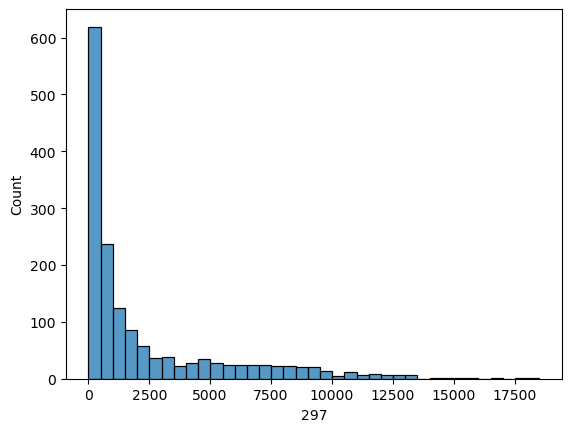

In [273]:
sns.histplot(signal_df['297'])

<Axes: xlabel='24', ylabel='Count'>

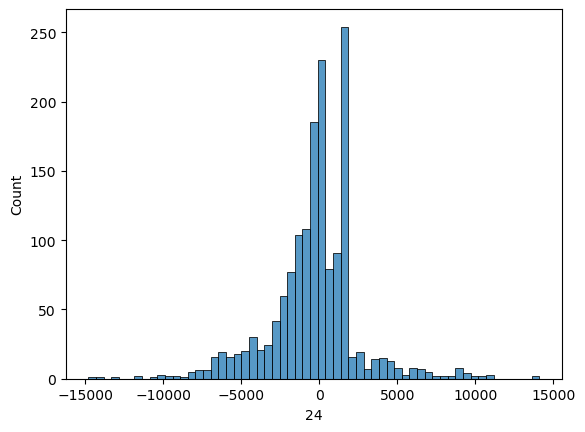

In [274]:
sns.histplot(signal_df['24'])

<Axes: xlabel='296', ylabel='Count'>

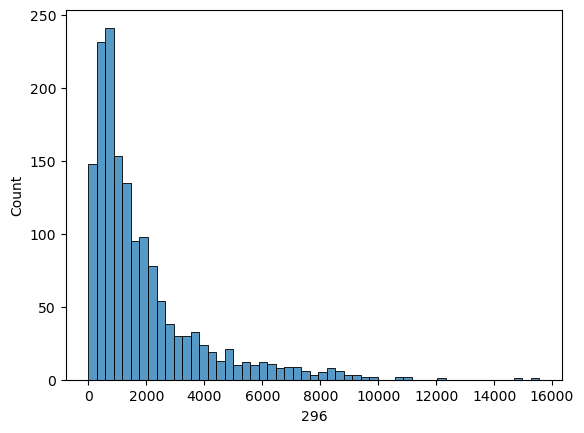

In [275]:
sns.histplot(signal_df['296'])

<Axes: xlabel='23', ylabel='Count'>

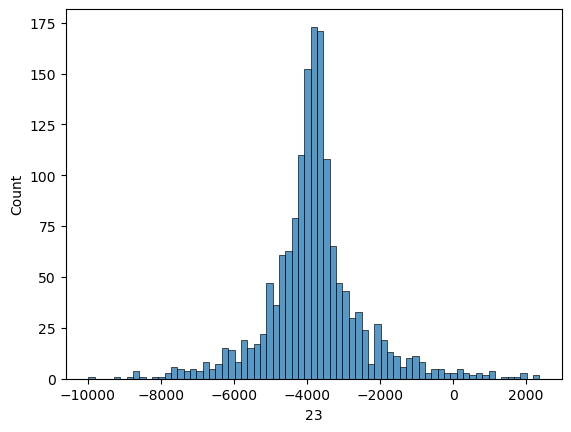

In [276]:
sns.histplot(signal_df['23'])

<Axes: >

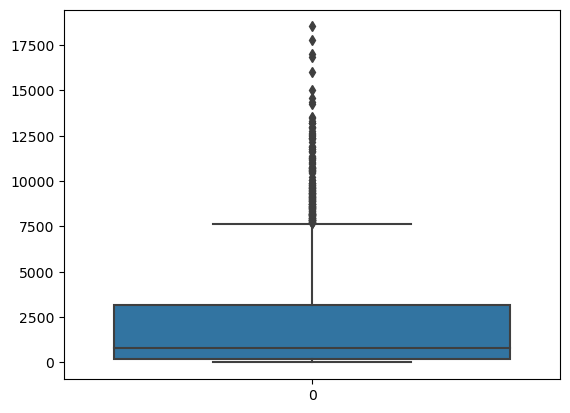

In [277]:
sns.boxplot(signal_df['297'])

<Axes: >

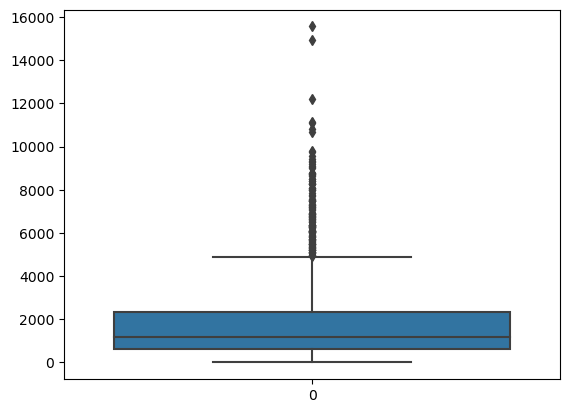

In [278]:
sns.boxplot(signal_df['296'])

<Axes: >

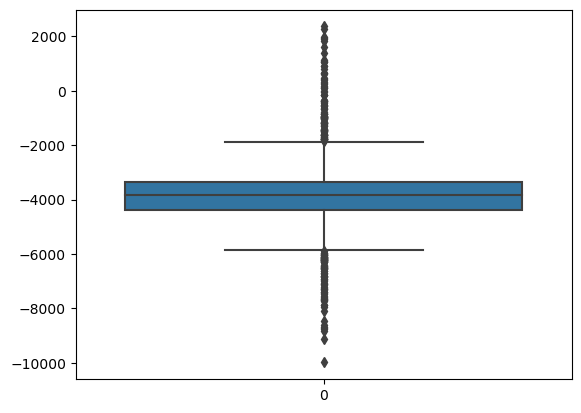

In [279]:
sns.boxplot(signal_df['23'])

<Axes: >

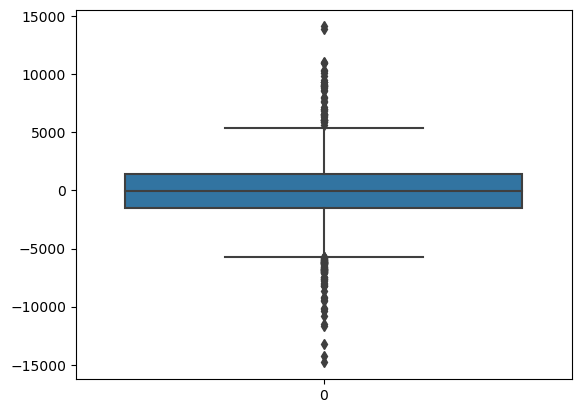

In [280]:
sns.boxplot(signal_df['24'])

##### Observations: 

The pie chart shows the target column is highly imbalanced with 93.36% of Pass (-1) values & 6.64% of Fail (1) values. 
This can introduce bias in the model as a result model will be inclined towards classifying majority class (Pass) and hence will not perform well on test data.

On analysing the top 4 features with highest standard deviation using histograms & box plots, below are the findings: 

    Column '297' & '296' are highly rightly skewed with outliers above upper limit.

    Column '24' has binomial distribution and looks like it has two clusters but has outliers both above upper limit (max) & below lower limit (min).

    Column '23' has normal distribution but has outliers at both the ends (above max & below min)

In [36]:
# Q3 B: Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

<Axes: xlabel='297', ylabel='296'>

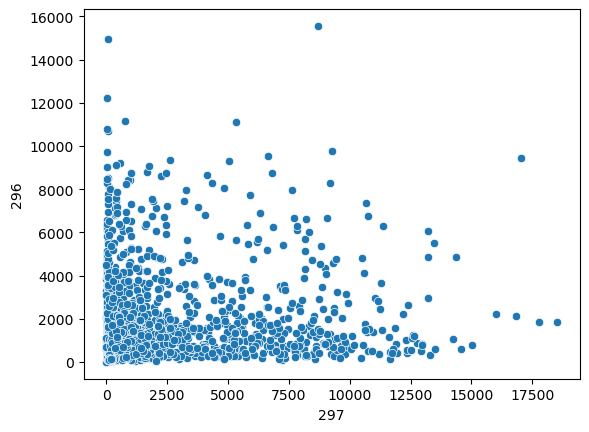

In [281]:
#Lets do some bivariate analysis on variables with high standard deviation 
sns.scatterplot(x= signal_df['297'],y= signal_df['296'])

<Axes: xlabel='23', ylabel='24'>

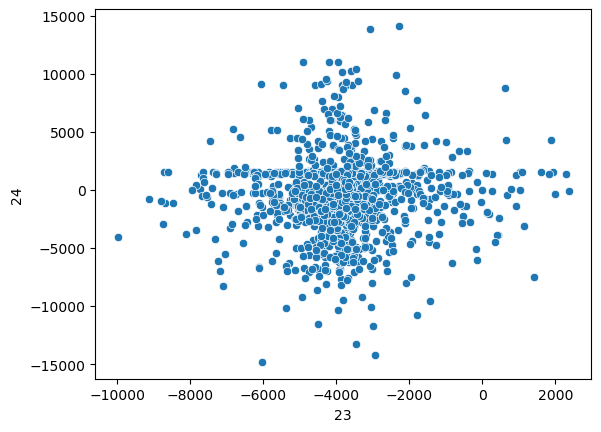

In [282]:
sns.scatterplot(x= signal_df['23'],y= signal_df['24'])

<Axes: xlabel='Pass/Fail', ylabel='23'>

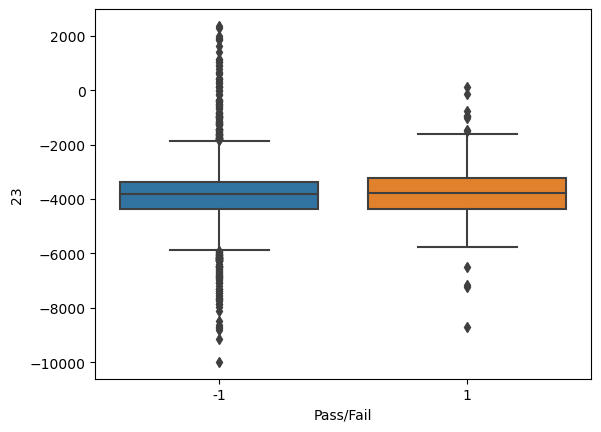

In [283]:
sns.boxplot(y=signal_df['23'], x= signal_df['Pass/Fail'])

<Axes: xlabel='Pass/Fail', ylabel='296'>

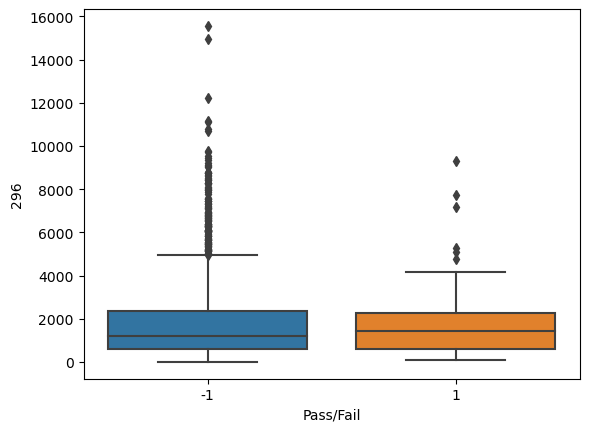

In [284]:
sns.boxplot(y=signal_df['296'], x= signal_df['Pass/Fail'])

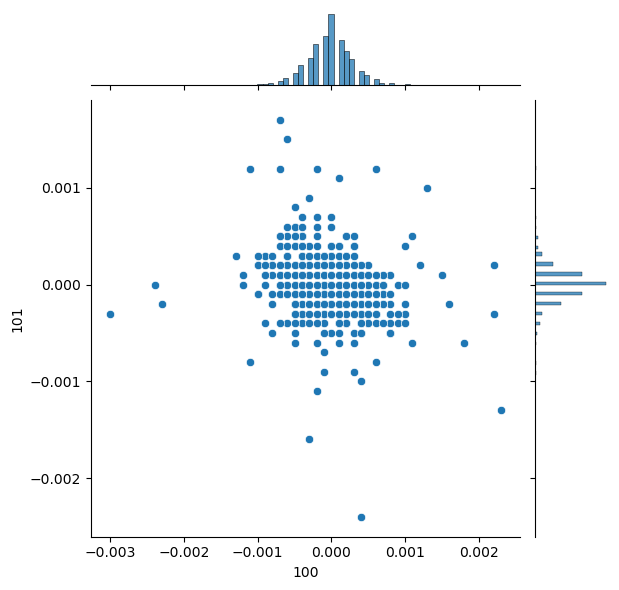

In [285]:
#lets do bivariate analysis on variables with lowest standard deviation
sns.jointplot(x= signal_df['100'],y= signal_df['101'])

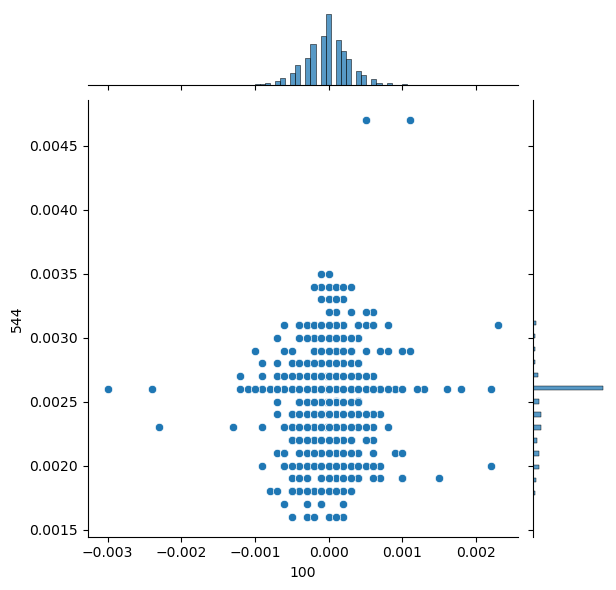

In [286]:
sns.jointplot(x= signal_df['100'],y= signal_df['544'])

<Axes: xlabel='Pass/Fail', ylabel='95'>

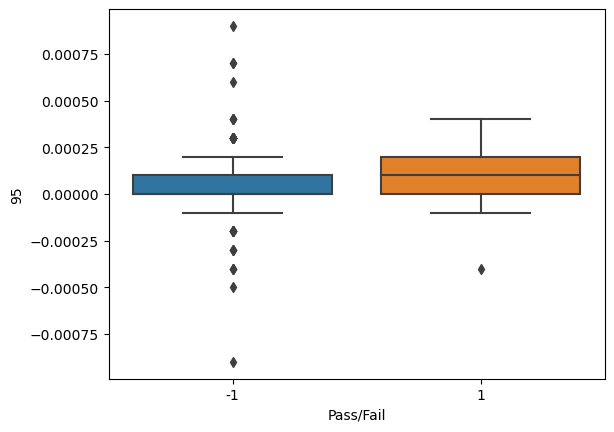

In [287]:
sns.boxplot(y=signal_df['95'], x= signal_df['Pass/Fail'])

<Axes: xlabel='Pass/Fail', ylabel='101'>

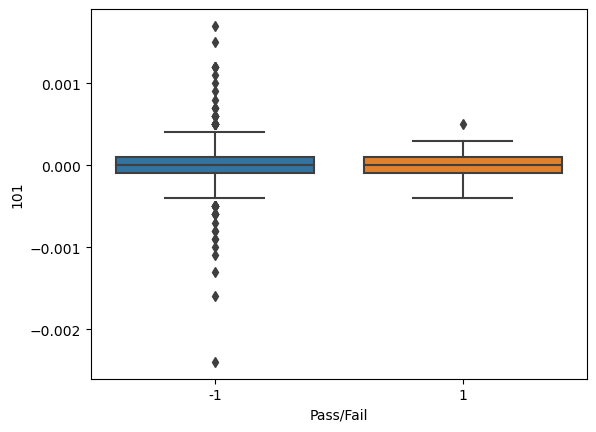

In [288]:
sns.boxplot(y=signal_df['101'], x= signal_df['Pass/Fail'])

<Axes: >

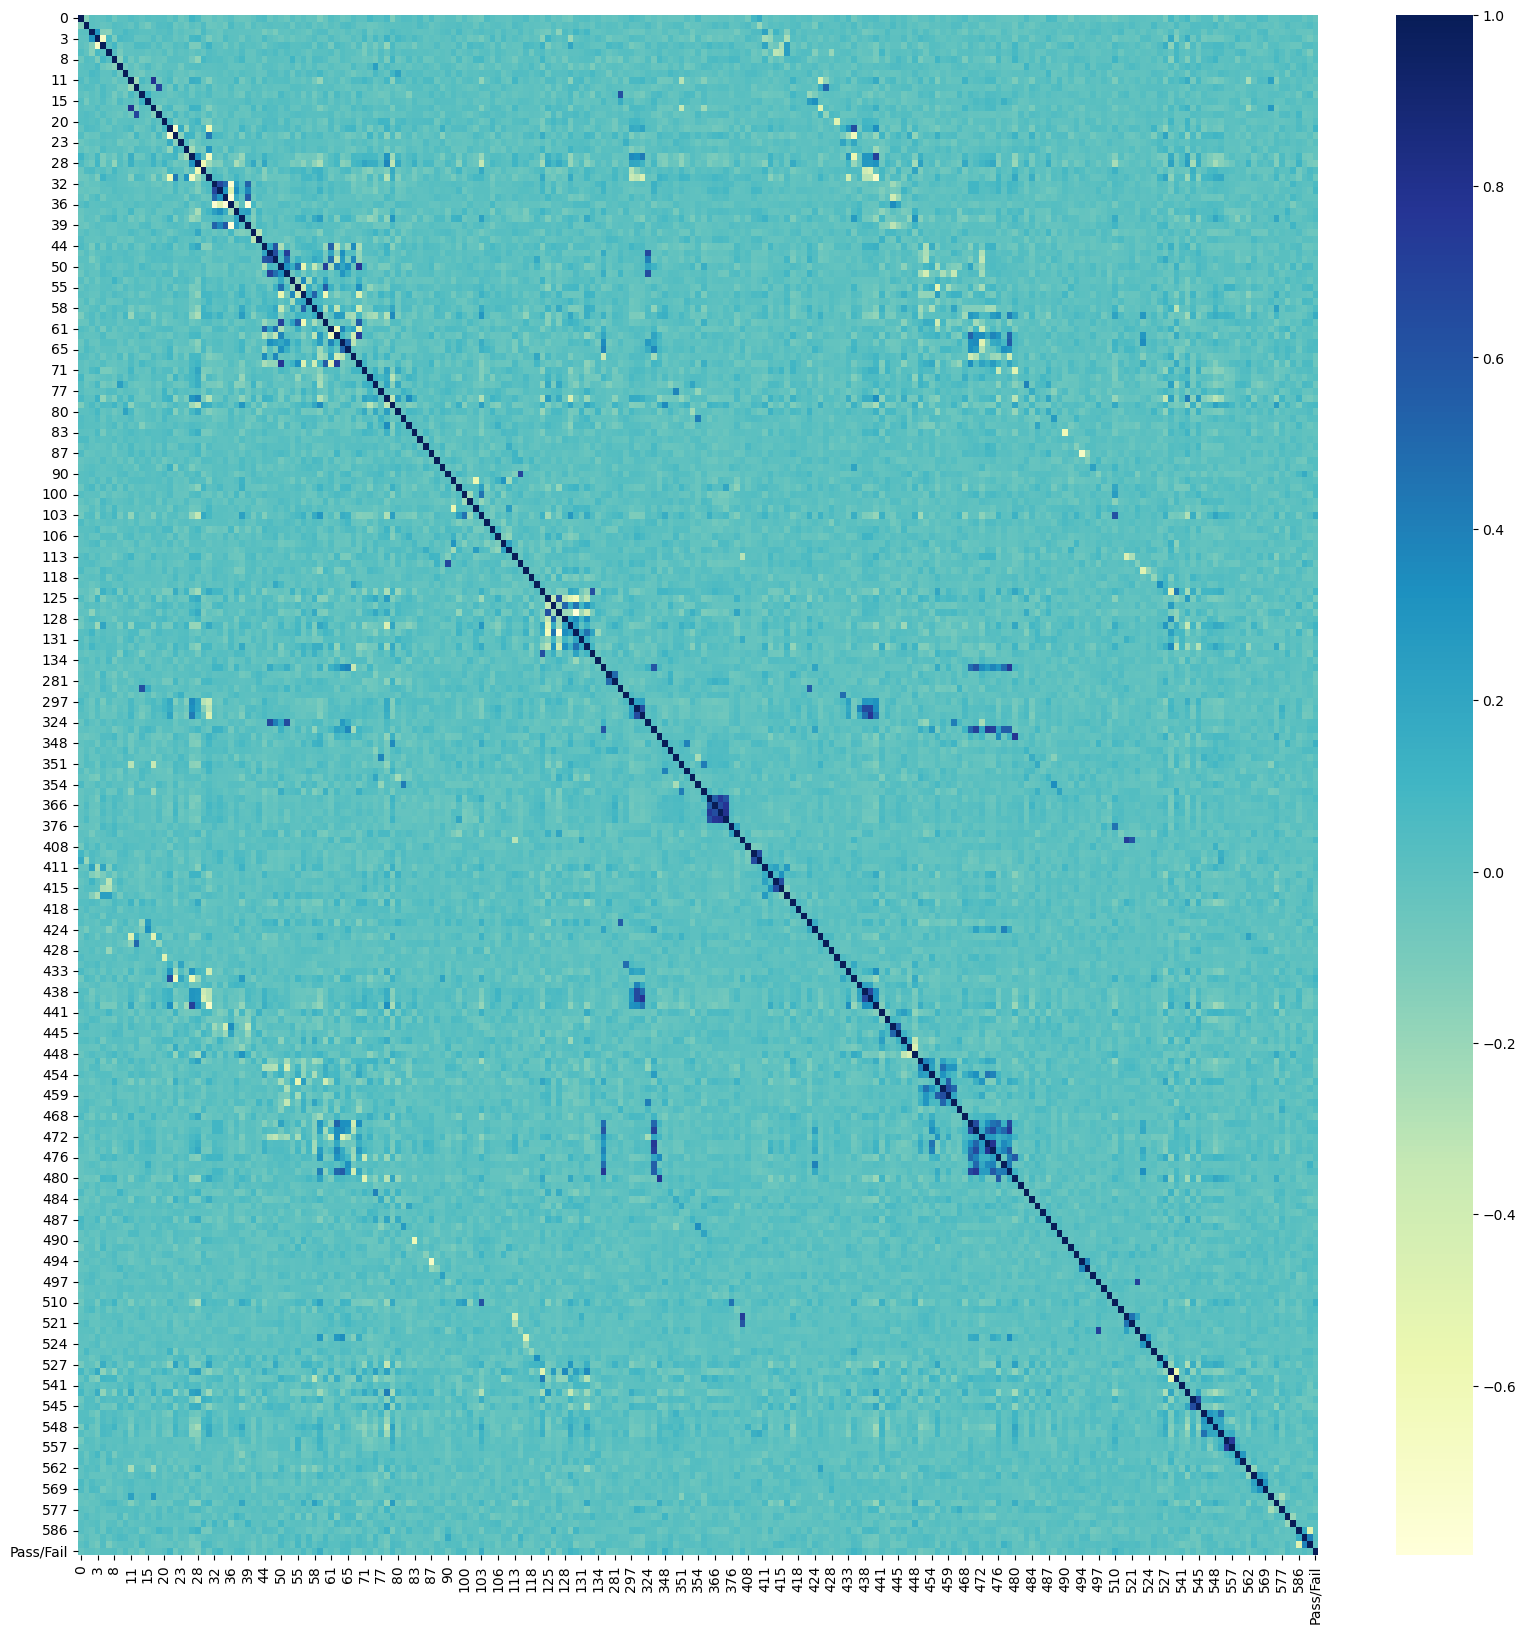

In [59]:
#Performing multivariate analysis
#We can't perform pairplot with so many features, hence plotting heatmap again though we have plotted it in above question
plt.figure(figsize= (20,20))
sns.heatmap(signal_df.corr(),cmap= 'YlGnBu')

<Axes: >

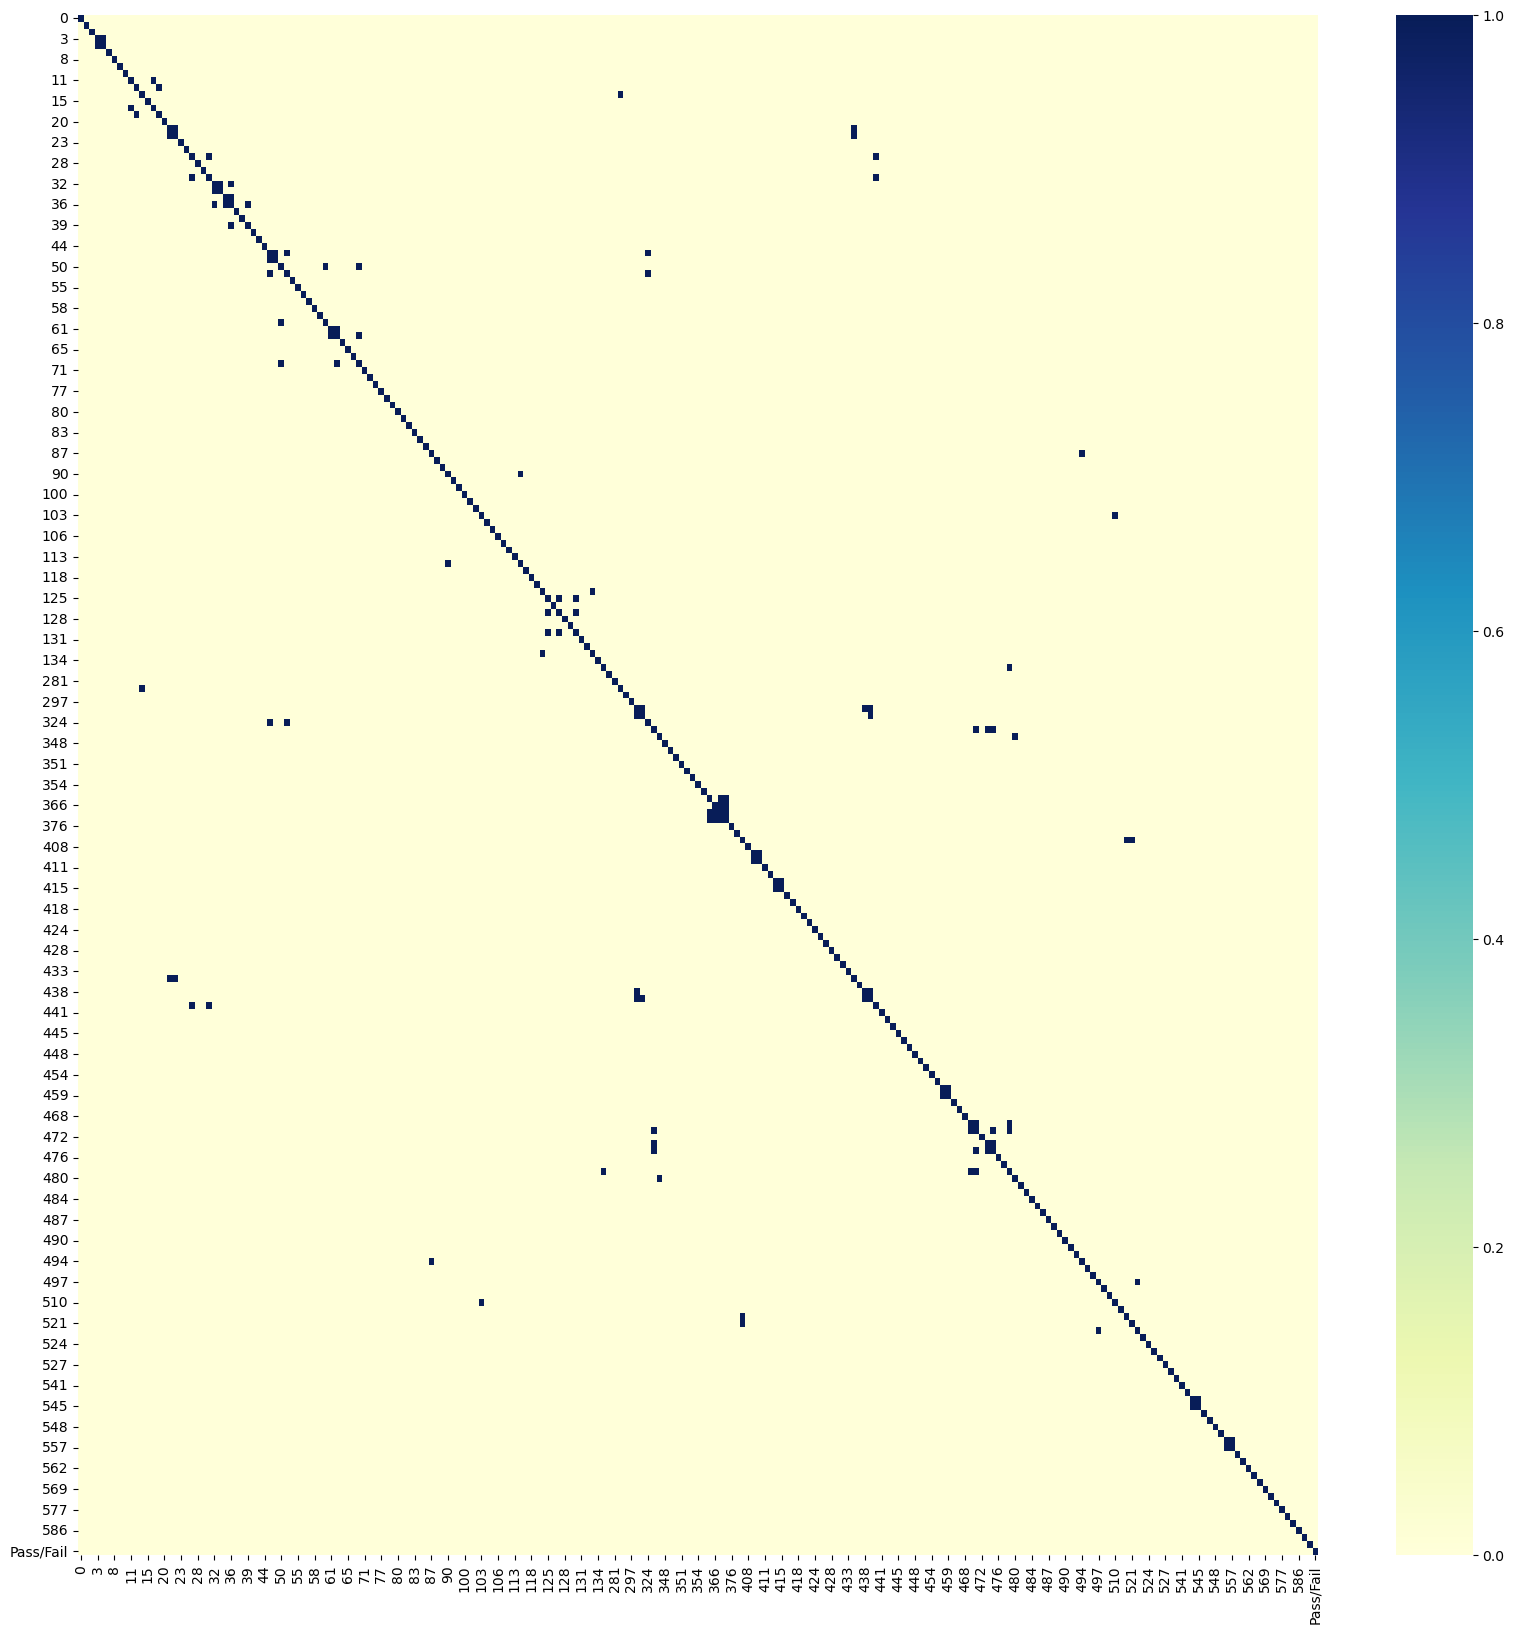

In [289]:
#We can see some collinearity between variables butlets filter to see only above 0.6 & below -0.6
plt.figure(figsize= (20,20))
sns.heatmap(((signal_df.corr()> 0.6) | (signal_df.corr() < -0.6)), cmap= 'YlGnBu')

##### Observations:

Looking at the scatter plot between features '297' & '296', there is no correlation between the variables and that is what is expecetd as we removed high collinear features.

Same goes for features '23' & '24', scatter plot shows a cloud of datapoints and hence no correlation as expected.

The box plot of feature '23' and target variable 'Pass/Fail' shows that median of Pass & Fail are similar and both have outliers above/below max & min values.But Pass (-1) has very high number of outliers compared to Fail(1).

The box plot of feature '296' and target variable 'Pass/Fail' shows that median of Pass & Fail are almost similar (Fail is little higher) and both have outliers above max values.But Pass (-1) has very high number of outliers compared to Fail(1).

Outliers in both the box plots is as expected beacuse the features '23' & '296' both are features with highest standard deviation.

The joint plot of features with least standard deviation  '100' & '101' shows that both are almost normal distribution (obviously as they have least standard deviation) and have no correlation as expected.

Same goes for joint plot between '100' & '544'. We can see a comparatively longer tail in '544' showing a slight right skewed but the values are very close, hence its standard deviation is less & almost normal distribution. Here also, we can't see any correlation between both the features.

The box plot of feature '95' and target variable 'Pass/Fail' shows that median of Fail is slightly higher than Pass.Pass (-1) has few outliers and Fail has just 1 outlier value below min value. As feature '95' has low standard deviation, hence there might be very few outlier and the range also will be less.

In the box plot of feature '101' with target variable 'Pass/Fail', we notice the median of both 'Pass' & 'Fail' is almost similar. Pass (-1) has few outliers and Fail has just 1 outlier value above max value. As feature '101' has low standard deviation, hence there might be very few outlier and the range also will be less. 

The heatmap shows that few columns has some collinearity as we have already removed collinear columns above 0.8 & -0.8, didn't deleted below 0.8 so that we don't loose any information and drop only the highly correlated columns. So the data points showing up here are for the columns having collinearity between 0.6 - 0.8 & (-0.6) - (-0.8), darkest(positive correlation) & lightest(negative correlation).

#### Q4. Data pre-processing: [10 Marks]

A. Segregate predictors vs target attributes. [2 Marks]

B. Check for target balancing and fix it if found imbalanced. [3 Marks]

C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]

D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

In [290]:
# Q4 A: Segregate predictors vs target attributes.
X = signal_df.drop(columns= ['Pass/Fail'])
y = signal_df['Pass/Fail']
X.shape, y.shape

((1567, 222), (1567,))

Seaparated predictors vs target attributes, we can notice that we have 222 features (predictors)

In [291]:
# Q4 B: Check for target balancing and fix it if found imbalanced.
y.value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

The target variable is highly imbalance with 93.3% of Pass and just 6.6% of Fail values.

In [292]:
#Using SMOTE technique to upsample the minority class in the imbalanced data.
upsample = SMOTE(random_state=42)
X_upsampled, y_upsampled = upsample.fit_resample(X, y)
X_upsampled.shape, y_upsampled.shape

((2926, 222), (2926,))

In [293]:
y_upsampled.value_counts(normalize=True)

-1    0.5
 1    0.5
Name: Pass/Fail, dtype: float64

Post SMOTE technique, the no of observations has increased as expected and the target variable is balanced with 50% of Fail & 50% of Pass.

In [294]:
# Q4 C:  Perform train-test split and standardise the data or vice versa if required.
X_train, X_test, y_train, y_test = train_test_split(X_upsampled,y_upsampled,random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2194, 222), (732, 222), (2194,), (732,))

In [295]:
# We definetely need to standardize the features and give equal weightage to all the columns. 
#Also, I am scaling after splitting the train test to avoid data leakage.
X_scaled_train = X_train.apply(zscore)
X_scaled_test = X_test.apply(zscore)

In [296]:
X_scaled_train.head()

,0,1,2,3,6,7,8,9,10,11,...,568,569,570,571,577,582,585,586,588,589
533,-0.162988,-1.905381,-2.166522,-0.361019,-0.549602,0.256703,2.075868,-3.753180,-3.332075,0.665894,...,-0.023155,-0.075620,0.026731,0.756093,0.428062,-1.269405,-0.594992,-2.103643,0.985424,-1.213003
1933,-0.730546,0.273255,-0.177067,0.559379,-0.426452,0.091066,-0.376441,-0.704741,-1.780511,0.928805,...,-0.001231,-0.168383,-0.029526,0.905494,0.468271,0.307057,-0.367370,0.498058,2.046369,0.166288
954,-0.509949,0.493998,0.167286,1.064408,-1.792076,0.524147,-0.153570,-0.346749,-0.833256,-0.199287,...,-1.791663,-0.628352,0.078316,0.888783,-0.484052,-0.427905,-0.078510,-0.000526,-0.759785,-0.596329
459,-0.171450,0.104735,1.291473,-0.183699,1.683260,0.144095,1.257507,-0.631836,-0.576368,-0.514718,...,-0.244873,-0.730997,0.062343,0.980030,-0.281898,1.660263,-0.168991,0.108256,-1.215057,-0.838230
486,-0.167492,-0.655664,-1.337896,0.206993,0.695862,0.510071,1.662715,-0.763415,-0.774873,0.485648,...,-0.023155,-0.075620,0.300742,-0.001393,-0.097629,-0.396738,-0.521740,0.869730,-0.721846,-0.830601


In [297]:
# Q4 D:  Check if the train and test data have similar statistical characteristics when compared with original data.
X_scaled_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,2194.0,-1.131476e-15,1.000228,-3.630412,-0.686521,-0.117853,0.562508,4.738004
1,2194.0,-1.395825e-15,1.000228,-4.705266,-0.542595,0.055375,0.548902,4.860632
2,2194.0,-5.968689e-15,1.000228,-5.124807,-0.690365,-0.074906,0.588104,4.242561
3,2194.0,5.035980e-16,1.000228,-3.676130,-0.714622,-0.224736,0.517820,6.028386
6,2194.0,-8.096430e-17,1.000228,-3.654838,-0.482949,0.059399,0.542264,5.375555
...,...,...,...,...,...,...,...,...
582,2194.0,-2.072686e-15,1.000228,-7.004073,-0.646071,0.039596,0.649068,2.969263
585,2194.0,4.857858e-18,1.000228,-0.825395,-0.318275,-0.132778,0.128873,41.369974
586,2194.0,-6.477144e-17,1.000228,-2.538770,-0.662282,-0.045851,0.531290,7.324124
588,2194.0,3.967251e-17,1.000228,-1.708269,-0.683907,-0.169406,0.470260,8.762986


In [298]:
X_scaled_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,732.0,-2.423077e-15,1.000684,-2.744807,-0.670303,-0.121918,0.600157,3.203636
1,732.0,-7.801895e-16,1.000684,-4.471890,-0.553644,-0.023521,0.530046,4.929122
2,732.0,-3.227534e-16,1.000684,-4.884523,-0.652160,-0.070936,0.565628,3.968014
3,732.0,1.638034e-16,1.000684,-1.740532,-0.727219,-0.225629,0.499974,5.939966
6,732.0,-6.916143e-16,1.000684,-3.454496,-0.466643,0.011523,0.500048,5.200213
...,...,...,...,...,...,...,...,...
582,732.0,-3.031091e-14,1.000684,-6.212077,-0.648755,0.050460,0.658570,2.847322
585,732.0,-1.274026e-16,1.000684,-0.464058,-0.210005,-0.081232,0.042787,25.950745
586,732.0,-1.079889e-16,1.000684,-3.568605,-0.629353,-0.054917,0.583470,7.600010
588,732.0,1.528832e-16,1.000684,-1.575603,-0.696951,-0.200321,0.515151,6.064853


In [299]:
X_upsampled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,2926.0,3008.276255,72.186456,2743.2400,2959.017458,2999.717579,3048.964167,3356.3500
1,2926.0,2495.442794,70.975696,2158.7500,2457.640000,2497.773680,2533.480000,2846.4400
2,2926.0,2200.250855,27.593647,2060.6600,2181.323272,2198.310668,2216.477800,2315.2667
3,2926.0,1376.334872,377.781933,0.0000,1104.924100,1293.148281,1572.469800,3715.0417
6,2926.0,101.136475,5.277765,82.1311,98.624095,101.433300,103.961100,129.2522
...,...,...,...,...,...,...,...,...
582,2926.0,0.500313,0.003230,0.4778,0.498209,0.500500,0.502427,0.5098
585,2926.0,3.112503,2.727417,1.1975,2.366724,2.806100,3.374170,99.3032
586,2926.0,0.021841,0.010959,-0.0169,0.014691,0.021341,0.027800,0.1028
588,2926.0,0.005458,0.002633,0.0010,0.003616,0.005000,0.006718,0.0286


In [300]:
signal_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.54000,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.74500,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.05550,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.16990,3715.0417
6,1567.0,101.112908,6.209271,82.1311,97.93780,101.4922,104.53000,129.2522
...,...,...,...,...,...,...,...,...
585,1567.0,3.067826,3.576891,1.1975,2.30650,2.7577,3.29495,99.3032
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.02760,0.1028
588,1567.0,0.005283,0.002866,0.0010,0.00330,0.0046,0.00640,0.0286
589,1567.0,99.670066,93.861936,0.0000,44.36860,72.0230,114.74970,737.3048


As I used Z score for scaling, it reduces the mean to zero & standard deviation to 1, we can see that here train & test have standard deviation ~1 and mean ~0.  It doesnot change the distribution of the variable and doesn't change correlation & covariance between variable as it was in previous dataframe (upsampled/ original).

#### Q5. Model training, testing and tuning: [20 Marks]

A. Use any Supervised Learning technique to train a model. [2 Marks]

B. Use cross validation techniques. [3 Marks]

    Hint: Use all CV techniques that you have learnt in the course.

C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]

    Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 

D. Use any other technique/method which can enhance the model performance. [4 Marks]

    Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

E. Display and explain the classification report in detail. [3 Marks]

F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

In [301]:
# Q5 A:  Use any Supervised Learning technique to train a model.
# I am using Decision Tree to train the model  
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_scaled_train, y_train)
y_hat_dtree= dTree.predict(X_scaled_train)
y_pred_dtree = dTree.predict(X_scaled_test)

In [302]:
#Printing training accuracy
accuracy_score(y_hat_dtree,y_train)

1.0

In [303]:
#printing testing accuracy
accuracy_score(y_pred_dtree,y_test)

0.7336065573770492

<Figure size 1000x500 with 0 Axes>

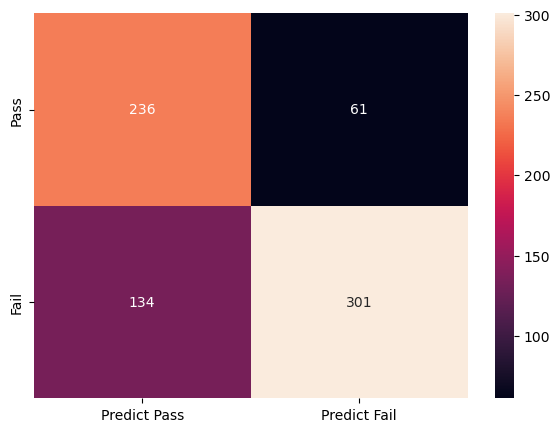

In [318]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_dtree,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [304]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

          -1       0.79      0.64      0.71       370
           1       0.69      0.83      0.76       362

    accuracy                           0.73       732
   macro avg       0.74      0.73      0.73       732
weighted avg       0.74      0.73      0.73       732



The decision tree model's accuracy on training set is 100% while it reduces drastically in test set ~73.3% which means model was overfitting.

Classification report shows Precision, Recall & F1 score are 74%, 73% & 73% respectively.

In [326]:
#Saving the results in a dataframe
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dtree).ravel()

#dtree_score = dtree.score(X_scaled_test, y_test)
dtree_train_accuracy = accuracy_score(y_hat_dtree,y_train)
dtree_test_accuracy = accuracy_score(y_pred_dtree,y_test)
dtree_recall = round(tp/(tp+fn), 3)   
dtree_precision = round(tp/(tp+fp), 3)  
dtree_specificity =round(tn/(tn+fp),3)    

result = pd.DataFrame({'Model' : ['Decision Tree'], 'Training Accuracy' : [dtree_train_accuracy],
                       'Testing Accuracy' : [dtree_test_accuracy],'Precision' : [dtree_precision],
                      'Recall-True positive rate' : [dtree_recall], 'Specificity-True negative rate' : [dtree_specificity],
                       'False positive rate' :  [1-dtree_specificity]})
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.0,0.733607,0.692,0.831,0.638,0.362


In [305]:
# Q5 B:  Use cross validation techniques.

In [306]:
#Trying K Fold cross validation
num_folds = 10
kfold = KFold(n_splits=num_folds)
dTree_kfold = DecisionTreeClassifier(random_state=1)
dTree_kfold_score = cross_val_score(dTree_kfold, X_scaled_train,y_train, cv=kfold)
dTree_kfold_score

array([0.9       , 0.90909091, 0.86818182, 0.85909091, 0.88127854,
       0.87671233, 0.88127854, 0.87214612, 0.94063927, 0.89041096])

In [307]:
print("Accuracy of KFold: %.3f%% (%.3f%%)" % (dTree_kfold_score.mean()*100.0, dTree_kfold_score.std()*100.0))

Accuracy of KFold: 88.788% (2.250%)


In [308]:
#Trying Startified cross validation
k=10
stratified_kfold = StratifiedKFold(n_splits = k)
dTree_skfold = DecisionTreeClassifier(random_state=1)
dTree_skfold_score = cross_val_score(dTree_skfold,  X_scaled_train,y_train, cv = stratified_kfold)

In [309]:
print("Accuracy of stratified KFold: %.3f%% (%.3f%%)" % (dTree_skfold_score.mean()*100.0, dTree_skfold_score.std()*100.0))

Accuracy of stratified KFold: 88.741% (2.024%)


In [310]:
# Trying Bootstrap sampling
bootstrap_iteration = 10
dTree_boot_score = []
dTree_boot = DecisionTreeClassifier(random_state=1)

In [311]:
for i in range(bootstrap_iteration):
    X_, y_ = resample(X_scaled_train,y_train)
    dTree_boot.fit(X_, y_)
    y_pred_dTree_boot = dTree_boot.predict(X_scaled_test)
    
    acc = accuracy_score(y_pred_dTree_boot, y_test)
    dTree_boot_score.append(acc)

In [312]:
print("Accuracy of Bootstrap sampling: %.3f%% (%.3f%%)" % (np.mean(dTree_boot_score)*100.0, np.std(dTree_boot_score)*100.0))

Accuracy of Bootstrap sampling: 70.273% (9.828%)


I tried Leave One Out cross validation as well but it was very time consuming due to the size of data and hence thought of skipping it as its not efficient.

I used balanced & scaled data in the cross validations and even used only train set in cross validation so that we can avoid data leakage and can test the performance in test data.

The accuracy of KFold is the highest with 88.78% followed by Stratified KFold (88.74%) and the least is Boostrap accuracy (71.2%). The reason for K fold & stratified cv are similar and this can be because in we are using balanced training & testing dataset, hence we will use K fold cross validation further (Model tuning)

In [313]:
# Q5 C:  Apply hyper-parameter tuning techniques to get the best accuracy.
param_dtree = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}

In [314]:
#Hypertuning using Grid Search
dtree_grid_tuned = GridSearchCV(DecisionTreeClassifier(random_state=1),param_dtree,cv=kfold)
dtree_grid_tuned.fit(X_scaled_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [235]:
#Printing the best parameters
print(dtree_grid_tuned.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=1)


In [236]:
dTree.Grid_best = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,random_state=1)

In [238]:
dTree.Grid_best.fit(X_scaled_train,y_train)
y_hat_dtree_grid_tuned= dTree.Grid_best.predict(X_scaled_train)
y_pred_dtree_grid_tuned= dTree.Grid_best.predict(X_scaled_test)
print ('Training Accuracy of Grid Search Decision tree K fold:', accuracy_score(y_hat_dtree_grid_tuned,y_train))
print ('Testing Accuracy of Grid Search Decision tree K fold:', accuracy_score(y_pred_dtree_grid_tuned,y_test))
print (classification_report(y_pred_dtree_grid_tuned,y_test))

Training Accuracy of Grid Search Decision tree K fold: 0.9776663628076573
Testing Accuracy of Grid Search Decision tree K fold: 0.8633879781420765
              precision    recall  f1-score   support

          -1       0.85      0.88      0.86       358
           1       0.88      0.85      0.86       374

    accuracy                           0.86       732
   macro avg       0.86      0.86      0.86       732
weighted avg       0.86      0.86      0.86       732



<Figure size 1000x500 with 0 Axes>

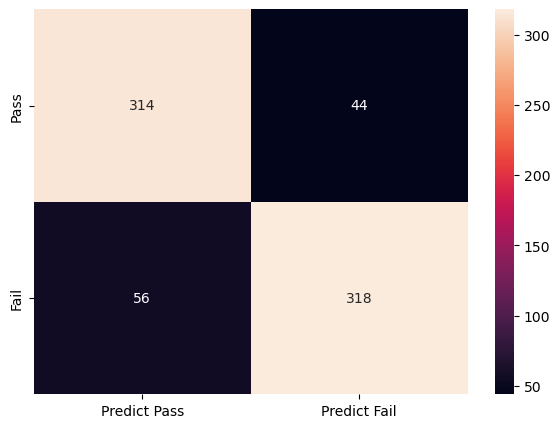

In [319]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_dtree_grid_tuned,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [245]:
#Hypertuning using Randomized search
param_dtree_random = {"max_depth": [3, None],"max_features": sp_randint(1, 11), "min_samples_split": sp_randint(2, 11),
                      "min_samples_leaf": sp_randint(1, 11),'criterion': ["gini", "entropy"]}
dtree_random_tuned = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), param_distributions=param_dtree_random, 
                                        n_iter= 10)
dtree_random_tuned.fit(X_scaled_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AAD5592950>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AAD50DC690>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AAD50DF110>})

In [246]:
print(dtree_random_tuned.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_features=7, min_samples_split=7,
                       random_state=1)


In [412]:
dTree.Random_best = DecisionTreeClassifier(criterion='entropy', max_features=7, min_samples_split=7,
                       random_state=1)
dTree.Random_best.fit(X_scaled_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_features=7, min_samples_split=7,
                       random_state=1)

In [413]:
y_hat_dtree_random_tuned= dTree.Random_best.predict(X_scaled_train)
y_pred_dtree_random_tuned= dTree.Random_best.predict(X_scaled_test)
print ('Training Accuracy of Random Search Decision tree K fold:', accuracy_score(y_hat_dtree_random_tuned,y_train))
print ('Testing Accuracy of Random Search Decision tree K fold:', accuracy_score(y_pred_dtree_random_tuned,y_test))
print (classification_report(y_pred_dtree_random_tuned,y_test))

Training Accuracy of Random Search Decision tree K fold: 0.9886052871467639
Testing Accuracy of Random Search Decision tree K fold: 0.8142076502732241
              precision    recall  f1-score   support

          -1       0.77      0.85      0.81       338
           1       0.86      0.79      0.82       394

    accuracy                           0.81       732
   macro avg       0.81      0.82      0.81       732
weighted avg       0.82      0.81      0.81       732



<Figure size 1000x500 with 0 Axes>

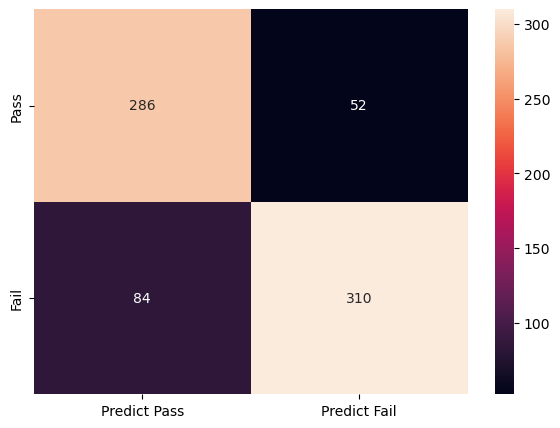

In [320]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_dtree_random_tuned,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

The results shows that using Grid search, we get training accuracy of 97.7% & testing as 86.3%.

Using RandomSearch, we get training accuracy of 98.8% & testing as 81.4%.

This shows that Grid search is better in our use case.

In [328]:
# Saving the grid seacrh results in the dataframe

tn, fp, fn, tp = confusion_matrix(y_pred_dtree_grid_tuned,y_test).ravel()

dtree_grid_train_accuracy = accuracy_score(y_hat_dtree_grid_tuned,y_train)
dtree_grid_test_accuracy = accuracy_score(y_pred_dtree_grid_tuned,y_test)
dtree_grid_recall = round(tp/(tp+fn), 3)   
dtree_grid_precision = round(tp/(tp+fp), 3)  
dtree_grid_specificity =round(tn/(tn+fp),3)    

result.loc[1] = ['Decision Tree with Grid Search CV', dtree_grid_train_accuracy, dtree_grid_test_accuracy, 
                 dtree_grid_precision,dtree_grid_recall,dtree_grid_specificity, 1-dtree_grid_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123


In [331]:
# Saving the random seacrh results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_dtree_random_tuned,y_test).ravel()

dtree_random_train_accuracy = accuracy_score(y_hat_dtree_random_tuned,y_train)
dtree_random_test_accuracy = accuracy_score(y_pred_dtree_random_tuned,y_test)
dtree_random_recall = round(tp/(tp+fn), 3)  
dtree_random_precision = round(tp/(tp+fp), 3)  
dtree_random_specificity =round(tn/(tn+fp),3)    

result.loc[2] = ['Decision Tree with Random Search CV', dtree_random_train_accuracy, dtree_random_test_accuracy, 
                 dtree_random_precision,dtree_random_recall,dtree_random_specificity, 1-dtree_random_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154


In [333]:
#Q5 D:  Use any other technique/method which can enhance the model performance.
# First lets check the feature importance
a = pd.DataFrame(dTree.feature_importances_, columns = ['importance'], index=X.columns).sort_values('importance', ascending = False)
a.index.name = 'Feature'
a['cummulative_importance'] = np.cumsum(a.importance)
most_imp = a[a['cummulative_importance'] <= .95]
print(len(most_imp))
most_imp

57


,importance,cummulative_importance
Feature,,
59,0.168974,0.168974
95,0.074409,0.243383
486,0.070755,0.314139
33,0.069170,0.383308
100,0.039827,0.423136
130,0.028005,0.451141
489,0.024654,0.475795
416,0.023496,0.499291
31,0.021136,0.520427


In [347]:
most_imp_cols= most_imp.index
most_imp_cols

Index(['59', '95', '486', '33', '100', '130', '489', '416', '31', '10', '428',
       '454', '473', '56', '424', '24', '367', '413', '280', '116', '50',
       '452', '568', '39', '427', '120', '448', '541', '588', '296', '444',
       '355', '348', '527', '86', '128', '82', '487', '423', '23', '558',
       '539', '511', '589', '351', '324', '499', '105', '490', '32', '445',
       '368', '55', '40', '101', '491', '460'],
      dtype='object', name='Feature')

The above are variables sorted by their importances, 57 features do almost 95% of the job.

We can try further reducing the dimensionality using PCA, Lets try that

In [369]:
#Trying to reduce further dimensions using PCA
pca = PCA()
pca.fit(X_scaled_train.loc[:, most_imp_cols])

PCA()

[0.05270745 0.09852444 0.1403449  0.17642767 0.21156689 0.24421247
 0.27465139 0.30320857 0.33028058 0.35492849 0.37924817 0.40284217
 0.42537659 0.44729865 0.46873992 0.48976535 0.50968785 0.52950889
 0.54886015 0.56783245 0.58628191 0.60429249 0.62191885 0.63921889
 0.65628996 0.67328219 0.68951669 0.70530044 0.72059003 0.73570163
 0.75068539 0.76535983 0.77947972 0.79338934 0.80711282 0.82010907
 0.83287926 0.84523782 0.85690134 0.86850615 0.87967135 0.89078067
 0.90132939 0.91162284 0.92173402 0.9314098  0.9408668  0.9499412
 0.95818245 0.96603311 0.97335747 0.98004966 0.98592441 0.99092006
 0.99558522 0.9981514  1.        ]


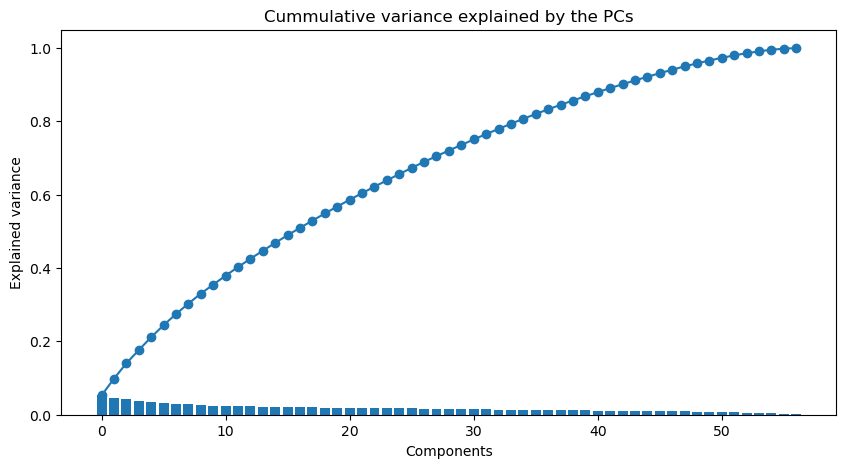

In [370]:
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.bar(x = range(0, len(pca.components_)), height = pca.explained_variance_ratio_)
plt.title('Cummulative variance explained by the PCs')
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.show()

As we have already reduced the features by checking their importance amd now further reducing it using PCA. 

The cumulative variance chart shows the 41 components are expalining the variance in the data by 95%. lets try to fit PCA on 40 components on Dtree Random search CV

In [405]:
pca_41 = PCA(n_components= 41)
pca_41.fit(X_scaled_train.loc[:, most_imp_cols])

PCA(n_components=41)

In [406]:
print("The eigen values are \n \n",pca_41.explained_variance_)
print( "\n")
print("The eigen vectors are \n \n",pca_41.components_)
print( "\n")

The eigen values are 
 
 [3.00569481 2.61275893 2.3848531  2.05765566 2.00384814 1.86164539
 1.73580535 1.62850008 1.54380623 1.40556325 1.38682412 1.34544595
 1.28504056 1.25011141 1.22270458 1.19898759 1.13606616 1.13030458
 1.10295479 1.08187656 1.05200437 1.02699028 1.00509201 0.98642348
 0.9734737  0.9689717  0.92575191 0.90006736 0.87170221 0.86170132
 0.85403246 0.83599171 0.80493082 0.79284285 0.78143453 0.74006417
 0.72796506 0.70455021 0.66209055 0.65990708 0.6339107 ]


The eigen vectors are 
 
 [[ 0.25257978 -0.06294987 -0.08606238 ...  0.03198361  0.02736597
  -0.03537881]
 [ 0.01799887  0.06138713 -0.0125005  ...  0.03623736 -0.03083109
   0.21816572]
 [ 0.27089581  0.17900323 -0.06313141 ...  0.02185318 -0.01766929
   0.05993754]
 ...
 [-0.07646631 -0.26316023  0.01170818 ...  0.07869945 -0.04543037
   0.05181473]
 [-0.13911612  0.21720124  0.10056741 ...  0.04840097  0.14159383
   0.09363107]
 [ 0.17238068 -0.13971487  0.15156288 ... -0.09556305 -0.21574499
   0.1271533

In [407]:
pca_train = pca_41.transform(X_scaled_train.loc[:, most_imp_cols])
pca_test = pca_41.transform(X_scaled_test.loc[:, most_imp_cols])

In [408]:
dTree.Grid_best = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,random_state=1)

In [409]:
dTree.Grid_best.fit(pca_train,y_train)
y_hat_dtree_grid_pca_tuned= dTree.Grid_best.predict(pca_train)
y_pred_dtree_grid_pca_tuned= dTree.Grid_best.predict(pca_test)
print ('Training Accuracy of Grid Search Decision tree K fold with PCA:', accuracy_score(y_hat_dtree_grid_pca_tuned,y_train))
print ('Testing Accuracy of Grid Search Decision tree K fold with PCA:', accuracy_score(y_pred_dtree_grid_pca_tuned,y_test))
print (classification_report(y_pred_dtree_grid_pca_tuned,y_test))

Training Accuracy of Grid Search Decision tree K fold with PCA: 0.9699179580674567
Testing Accuracy of Grid Search Decision tree K fold with PCA: 0.8333333333333334
              precision    recall  f1-score   support

          -1       0.82      0.84      0.83       362
           1       0.84      0.82      0.83       370

    accuracy                           0.83       732
   macro avg       0.83      0.83      0.83       732
weighted avg       0.83      0.83      0.83       732



<Figure size 1000x500 with 0 Axes>

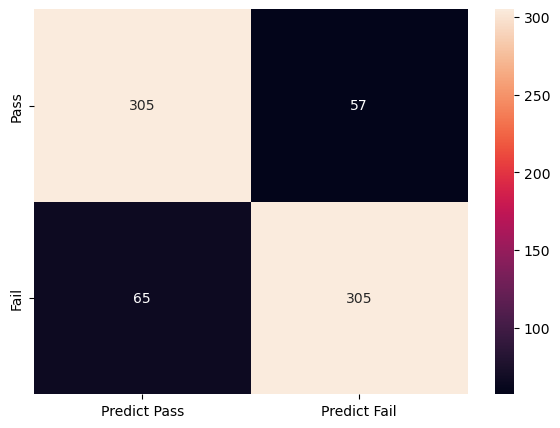

In [414]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_dtree_grid_pca_tuned,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [415]:
# Q5 E:  Display and explain the classification report in detail.
#Printing classification report of Decision Tree Grid Search with PCA
print (classification_report(y_pred_dtree_grid_pca_tuned,y_test))

              precision    recall  f1-score   support

          -1       0.82      0.84      0.83       362
           1       0.84      0.82      0.83       370

    accuracy                           0.83       732
   macro avg       0.83      0.83      0.83       732
weighted avg       0.83      0.83      0.83       732



In [410]:
# Saving the Decision Tree with PCA results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_dtree_grid_pca_tuned,y_test).ravel()

dtree_pca_train_accuracy = accuracy_score(y_hat_dtree_grid_pca_tuned,y_train)
dtree_pca_test_accuracy = accuracy_score(y_pred_dtree_grid_pca_tuned,y_test)
dtree_pca_recall = round(tp/(tp+fn), 3)  
dtree_pca_precision = round(tp/(tp+fp), 3)  
dtree_pca_specificity =round(tn/(tn+fp),3)    

result.loc[3] = ['Decision Tree Grid Search with PCA', dtree_pca_train_accuracy, dtree_pca_test_accuracy, 
                 dtree_pca_precision,dtree_pca_recall,dtree_pca_specificity, 1-dtree_pca_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157


Though I have already printed the classification reports of all the models I have tried as of now, latest is the Decision Tree with PCA. 

Also, comparing the results of all different Decision Tree models with different hyperparameters using Grid Search & Random search along with PCA is saved in a dataframe above.

The results shows that base model 'Decision Tree 'is overfitting and has training accuracy as 100% but decreasing drastically in testing and is ~73% only.

'Decision Tree with Grid Search CV' is performing much better than base model and has training accuracy as 97.7% but decreasing testing and is ~86.3% .

'Decision Tree with Random Search CV' is not better than Grid Search CV and has training accuracy as 98.8% but decreasing drastically in testing and is ~81.4% only.

The last model 'Decision Tree Grid Search with PCA' has less number of principal components and performing decent. It has training accuracy as 96.9% and testing accuracy is ~83.3%.

I think the best model is 'Decision Tree Grid Search with PCA'. Tthough the testing accuracy, recall, precision etc is better in 'Decision Tree with Grid Search CV' but that model is using too many features (222 features) whereas model 'Decision Tree Grid Search with PCA' uses only 41 components and hence is less complex, computationally less expensive and don't have much difference in testing accuracy as well as Recall & Precision .

In [420]:
# Q5 F:  Apply the above steps for all possible models that you have learnt so far.
'''We will use Pipeline to implement the same in the models - Logistics Regression, SVM, KNN & Random Forest.
Also, here I will not be using X_scaled_train & X_scaled_test as I will be doing scaling in pipeline and hence will use
X_train,Y_train with most_imp_cols which I figured out using feature importance'''

In [445]:
    #Trying Logistic Regression
    log_reg = LogisticRegression(random_state=1)
    pipe_log_reg = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 41)), ('model', log_reg)])

In [446]:
pipe_log_reg.fit(X_train.loc[:, most_imp_cols], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=41)),
                ('model', LogisticRegression(random_state=1))])

In [447]:
y_hat_log_reg = pipe_log_reg.predict(X_train.loc[:, most_imp_cols])
y_pred_log_reg = pipe_log_reg.predict(X_test.loc[:, most_imp_cols])
print ('Training Accuracy of Logistic Regression with PCA:', accuracy_score(y_hat_log_reg,y_train))
print ('Testing Accuracy of Logistic Regression with PCA:', accuracy_score(y_pred_log_reg,y_test))
print (classification_report(y_pred_log_reg,y_test))

Training Accuracy of Logistic Regression with PCA: 0.773017319963537
Testing Accuracy of Logistic Regression with PCA: 0.7800546448087432
              precision    recall  f1-score   support

          -1       0.72      0.82      0.77       325
           1       0.84      0.75      0.79       407

    accuracy                           0.78       732
   macro avg       0.78      0.78      0.78       732
weighted avg       0.79      0.78      0.78       732



<Figure size 1000x500 with 0 Axes>

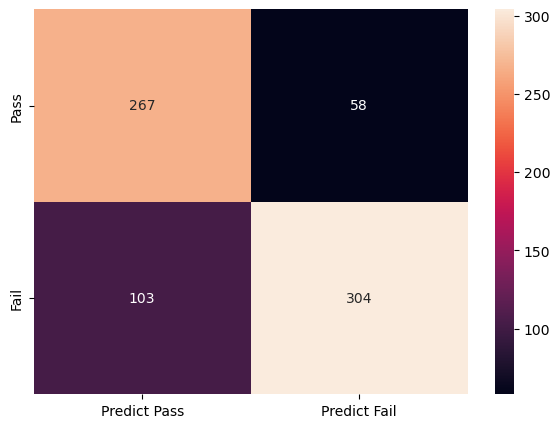

In [448]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_log_reg,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [449]:
# Saving the Logistic Regression with PCA results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_log_reg,y_test).ravel()

log_reg_train_accuracy = accuracy_score(y_hat_log_reg,y_train)
log_reg_test_accuracy = accuracy_score(y_pred_log_reg,y_test)
log_reg_recall = round(tp/(tp+fn), 3)  
log_reg_precision = round(tp/(tp+fp), 3)  
log_reg_specificity =round(tn/(tn+fp),3)    

result.loc[4] = ['Logistic Regression with PCA', log_reg_train_accuracy, log_reg_test_accuracy, 
                 log_reg_precision,log_reg_recall,log_reg_specificity, 1-log_reg_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.773017,0.780055,0.840,0.747,0.822,0.178
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181


In [435]:
#Hypertuning the logistic regression model with Grid Search
param_log_reg = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C' : np.logspace(-4, 4, 20),
                 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter' : [100, 1000,2500, 5000]}

In [437]:
log_reg_tuned = GridSearchCV(LogisticRegression(random_state=1),param_log_reg,cv= 10)
log_reg_tuned.fit(X_scaled_train.loc[:, most_imp_cols], y_train)
print(log_reg_tuned.best_estimator_)

LogisticRegression(C=0.23357214690901212, max_iter=1000, penalty='l1',
                   random_state=1, solver='saga')


In [438]:
#Training with best estimators
log_reg_best= LogisticRegression(C=0.23, max_iter=1000, penalty='l1',random_state=1, solver='saga')
pipe_log_reg_best = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 41)), ('model', log_reg_best)])
pipe_log_reg_best.fit(X_train.loc[:, most_imp_cols],y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=41)),
                ('model',
                 LogisticRegression(C=0.23, max_iter=1000, penalty='l1',
                                    random_state=1, solver='saga'))])

In [439]:
y_hat_log_reg_tuned= pipe_log_reg_best.predict(X_train.loc[:, most_imp_cols])
y_pred_log_reg_tuned= pipe_log_reg_best.predict(X_test.loc[:, most_imp_cols])
print ('Training Accuracy of Tuned Logistic Regression:', accuracy_score(y_hat_log_reg_tuned,y_train))
print ('Testing Accuracy of Tuned Logistic Regression:', accuracy_score(y_pred_log_reg_tuned,y_test))
print (classification_report(y_pred_log_reg_tuned,y_test))

Training Accuracy of Tuned Logistic Regression: 0.7789425706472197
Testing Accuracy of Tuned Logistic Regression: 0.7827868852459017
              precision    recall  f1-score   support

          -1       0.73      0.82      0.77       331
           1       0.83      0.75      0.79       401

    accuracy                           0.78       732
   macro avg       0.78      0.79      0.78       732
weighted avg       0.79      0.78      0.78       732



<Figure size 1000x500 with 0 Axes>

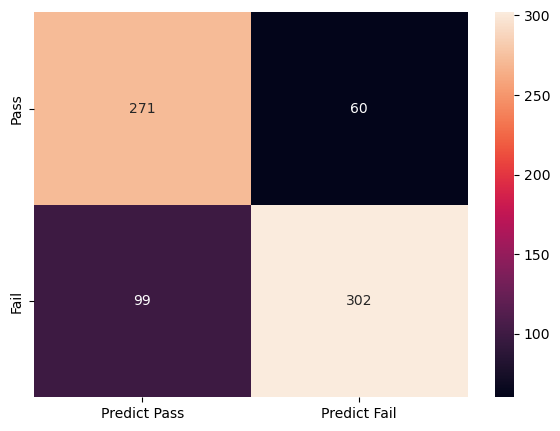

In [440]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_log_reg_tuned,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [444]:
# Saving the Tuned Logistic Regression results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_log_reg_tuned,y_test).ravel()

log_reg_tuned_train_accuracy = accuracy_score(y_hat_log_reg_tuned,y_train)
log_reg_tuned_test_accuracy = accuracy_score(y_pred_log_reg_tuned,y_test)
log_reg_tuned_recall = round(tp/(tp+fn), 3)  
log_reg_tuned_precision = round(tp/(tp+fp), 3)  
log_reg_tuned_specificity =round(tn/(tn+fp),3)    

result.loc[5] = ['Tuned Logistic Regression', log_reg_tuned_train_accuracy, log_reg_tuned_test_accuracy, 
                 log_reg_tuned_precision,log_reg_tuned_recall,log_reg_tuned_specificity, 1-log_reg_tuned_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.783045,0.788251,0.843,0.757,0.827,0.173
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181


In [452]:
#Trying SVM
svm = svm.SVC(random_state=1)
pipe_svm = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 41)), ('model', svm)])

In [453]:
pipe_svm.fit(X_train.loc[:, most_imp_cols], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=41)),
                ('model', SVC(random_state=1))])

In [455]:
y_hat_svm = pipe_svm.predict(X_train.loc[:, most_imp_cols])
y_pred_svm = pipe_svm.predict(X_test.loc[:, most_imp_cols])
print ('Training Accuracy of SVM with PCA:', accuracy_score(y_hat_svm,y_train))
print ('Testing Accuracy of SVM with PCA:', accuracy_score(y_pred_svm,y_test))
print (classification_report(y_pred_svm,y_test))

Training Accuracy of SVM with PCA: 0.9895168641750228
Testing Accuracy of SVM with PCA: 0.9658469945355191
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       345
           1       1.00      0.94      0.97       387

    accuracy                           0.97       732
   macro avg       0.97      0.97      0.97       732
weighted avg       0.97      0.97      0.97       732



<Figure size 1000x500 with 0 Axes>

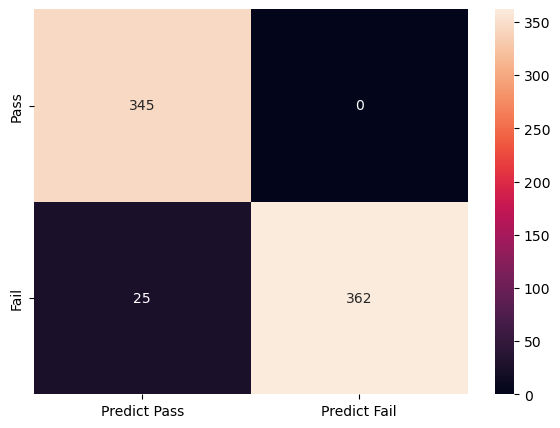

In [456]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_svm,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


In [458]:
# Saving the SVM with PCA results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_svm,y_test).ravel()

svm_train_accuracy = accuracy_score(y_hat_svm,y_train)
svm_test_accuracy = accuracy_score(y_pred_svm,y_test)
svm_recall = round(tp/(tp+fn), 3)  
svm_precision = round(tp/(tp+fp), 3)  
svm_specificity =round(tn/(tn+fp),3)    

result.loc[6] = ['SVM with PCA', svm_train_accuracy, svm_test_accuracy, 
                 svm_precision,svm_recall,svm_specificity, 1-svm_specificity]
result


,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.773017,0.780055,0.840,0.747,0.822,0.178
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181
6,SVM with PCA,0.989517,0.965847,1.000,0.935,1.000,0.000


In [468]:
#Hypertuning the SVM model with Grid Search
param_svm = {'C': [0.1,1,3,10, 100], 'gamma': [1,0.5,0.1,0.01,0.001]}

In [476]:
svm_tuned = GridSearchCV (svm.SVC(),param_svm,cv= 5)
svm_tuned.fit(X_scaled_train.loc[:, most_imp_cols], y_train)
print(svm_tuned.best_estimator_)

SVC(C=3, gamma=0.1)


In [477]:
#Training with best estimators
svm_best= svm.SVC(C=3,gamma =0.1)
pipe_svm_best = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 41)), ('model', svm_best)])
pipe_svm_best.fit(X_train.loc[:, most_imp_cols],y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=41)),
                ('model', SVC(C=3, gamma=0.1))])

In [478]:
y_hat_svm_tuned= pipe_svm_best.predict(X_train.loc[:, most_imp_cols])
y_pred_svm_tuned= pipe_svm_best.predict(X_test.loc[:, most_imp_cols])
print ('Training Accuracy of Tuned SVM:', accuracy_score(y_hat_svm_tuned,y_train))
print ('Testing Accuracy of Tuned SVM:', accuracy_score(y_pred_svm_tuned,y_test))
print (classification_report(y_pred_svm_tuned,y_test))

Training Accuracy of Tuned SVM: 1.0
Testing Accuracy of Tuned SVM: 0.9931693989071039
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       373
           1       0.99      1.00      0.99       359

    accuracy                           0.99       732
   macro avg       0.99      0.99      0.99       732
weighted avg       0.99      0.99      0.99       732



<Figure size 1000x500 with 0 Axes>

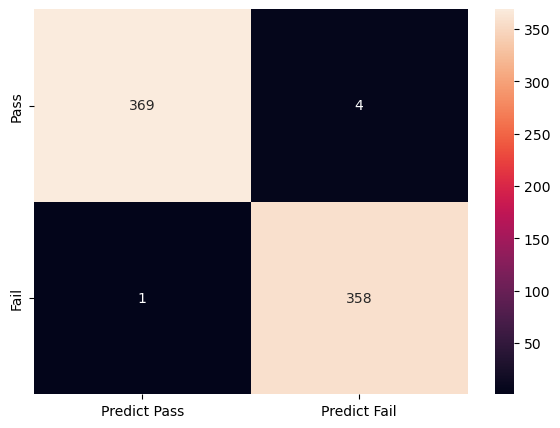

In [479]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_svm_tuned,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


In [480]:
# Saving the Tuned SVM results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_svm_tuned,y_test).ravel()

svm_tuned_train_accuracy = accuracy_score(y_hat_svm_tuned,y_train)
svm_tuned_test_accuracy = accuracy_score(y_pred_svm_tuned,y_test)
svm_tuned_recall = round(tp/(tp+fn), 3)  
svm_tuned_precision = round(tp/(tp+fp), 3)  
svm_tuned_specificity =round(tn/(tn+fp),3)    

result.loc[7] = ['Tuned SVM', svm_tuned_train_accuracy, svm_tuned_test_accuracy, 
                 svm_tuned_precision,svm_tuned_recall,svm_tuned_specificity, 1-svm_tuned_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.773017,0.780055,0.840,0.747,0.822,0.178
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181
6,SVM with PCA,0.989517,0.965847,1.000,0.935,1.000,0.000
7,Tuned SVM,1.000000,0.993169,0.989,0.997,0.989,0.011


In [483]:
#Trying KNN
knn = KNeighborsClassifier()
pipe_knn = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 41)), ('model', knn)])

In [484]:
pipe_knn.fit(X_train.loc[:, most_imp_cols], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=41)),
                ('model', KNeighborsClassifier())])

In [485]:
y_hat_knn = pipe_knn.predict(X_train.loc[:, most_imp_cols])
y_pred_knn = pipe_knn.predict(X_test.loc[:, most_imp_cols])
print ('Training Accuracy of Logistic Regression with PCA:', accuracy_score(y_hat_knn,y_train))
print ('Testing Accuracy of Logistic Regression with PCA:', accuracy_score(y_pred_knn,y_test))
print (classification_report(y_pred_knn,y_test))

Training Accuracy of Logistic Regression with PCA: 0.8103919781221514
Testing Accuracy of Logistic Regression with PCA: 0.7390710382513661
              precision    recall  f1-score   support

          -1       0.48      1.00      0.65       179
           1       1.00      0.65      0.79       553

    accuracy                           0.74       732
   macro avg       0.74      0.83      0.72       732
weighted avg       0.87      0.74      0.76       732



<Figure size 1000x500 with 0 Axes>

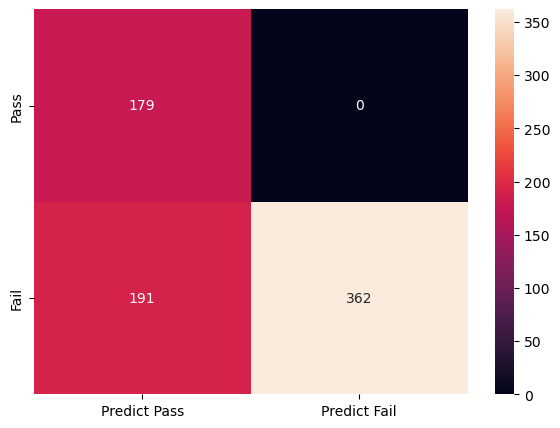

In [486]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_knn,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


In [487]:
# Saving the KNN with PCA results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_knn,y_test).ravel()

knn_train_accuracy = accuracy_score(y_hat_knn,y_train)
knn_test_accuracy = accuracy_score(y_pred_knn,y_test)
knn_recall = round(tp/(tp+fn), 3)  
knn_precision = round(tp/(tp+fp), 3)  
knn_specificity =round(tn/(tn+fp),3)    

result.loc[8] = ['KNN with PCA', knn_train_accuracy, knn_test_accuracy, 
                knn_precision,knn_recall,knn_specificity, 1-knn_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.773017,0.780055,0.840,0.747,0.822,0.178
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181
6,SVM with PCA,0.989517,0.965847,1.000,0.935,1.000,0.000
7,Tuned SVM,1.000000,0.993169,0.989,0.997,0.989,0.011
8,KNN with PCA,0.810392,0.739071,1.000,0.655,1.000,0.000


In [490]:
#Hypertuning the logistic regression model with Grid Search
#Finding the best k
accuracy_k = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_scaled_train,y_train)
    yhat_knn= knn.predict(X_scaled_test)
    accuracy_k[i-1] = accuracy_score(y_test, yhat_knn)

accuracy_k

array([0.74453552, 0.78278689, 0.65983607, 0.69125683, 0.61338798,
       0.63934426, 0.58606557, 0.59836066, 0.56010929, 0.57240437,
       0.55191257, 0.55737705, 0.54098361, 0.54371585, 0.53688525,
       0.53961749, 0.53142077, 0.53415301, 0.5273224 , 0.52868852])

<Axes: xlabel='No. of Neighbors ', ylabel='Accuracy'>

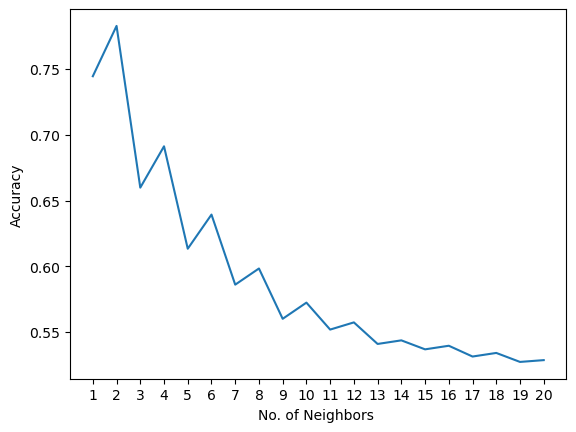

In [491]:
x_val = np.arange(1,21,step=1)
plt.xticks(x_val)
plt.xlabel('No. of Neighbors ')
plt.ylabel('Accuracy')
sns.lineplot(x= x_val, y= accuracy_k)

In [492]:
param_knn = { 'n_neighbors' : [2,3,4,5,6],
               'weights' : ['distance','uniform'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [494]:
knn_tuned = GridSearchCV(KNeighborsClassifier(),param_knn,cv= 10)
knn_tuned.fit(X_scaled_train.loc[:, most_imp_cols], y_train)
print(knn_tuned.best_estimator_)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)


In [495]:
#Training with best estimators
knn_best= KNeighborsClassifier(metric='manhattan', n_neighbors=2)
pipe_knn_best = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 41)), ('model', knn_best)])
pipe_knn_best.fit(X_train.loc[:, most_imp_cols],y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=41)),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=2))])

In [496]:
y_hat_knn_tuned= pipe_knn_best.predict(X_train.loc[:, most_imp_cols])
y_pred_knn_tuned= pipe_knn_best.predict(X_test.loc[:, most_imp_cols])
print ('Training Accuracy of Tuned Logistic Regression:', accuracy_score(y_hat_knn_tuned,y_train))
print ('Testing Accuracy of Tuned Logistic Regression:', accuracy_score(y_pred_knn_tuned,y_test))
print (classification_report(y_pred_knn_tuned,y_test))

Training Accuracy of Tuned Logistic Regression: 1.0
Testing Accuracy of Tuned Logistic Regression: 0.8743169398907104
              precision    recall  f1-score   support

          -1       0.75      1.00      0.86       278
           1       1.00      0.80      0.89       454

    accuracy                           0.87       732
   macro avg       0.88      0.90      0.87       732
weighted avg       0.91      0.87      0.88       732



<Figure size 1000x500 with 0 Axes>

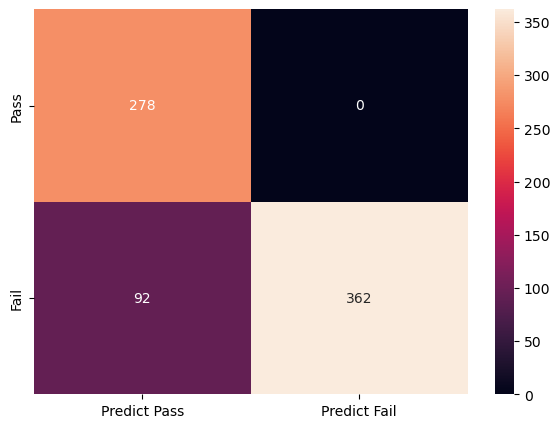

In [497]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_knn_tuned,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [499]:
# Saving the Tuned KNN results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_knn_tuned,y_test).ravel()

knn_tuned_train_accuracy = accuracy_score(y_hat_knn_tuned,y_train)
knn_tuned_test_accuracy = accuracy_score(y_pred_knn_tuned,y_test)
knn_tuned_recall = round(tp/(tp+fn), 3)  
knn_tuned_precision = round(tp/(tp+fp), 3)  
knn_tuned_specificity =round(tn/(tn+fp),3)    

result.loc[9] = ['Tuned KNN', knn_tuned_train_accuracy, knn_tuned_test_accuracy, 
                 knn_tuned_precision,knn_tuned_recall,knn_tuned_specificity, 1-knn_tuned_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.773017,0.780055,0.840,0.747,0.822,0.178
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181
6,SVM with PCA,0.989517,0.965847,1.000,0.935,1.000,0.000
7,Tuned SVM,1.000000,0.993169,0.989,0.997,0.989,0.011
8,KNN with PCA,0.810392,0.739071,1.000,0.655,1.000,0.000
9,Tuned KNN,1.000000,0.874317,1.000,0.797,1.000,0.000


In [501]:
#Trying Random Forest
rf = RandomForestClassifier(random_state=1)
pipe_rf = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 41)), ('model', rf)])

In [502]:
pipe_rf.fit(X_train.loc[:, most_imp_cols], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=41)),
                ('model', RandomForestClassifier(random_state=1))])

In [508]:
y_hat_rf = pipe_rf.predict(X_train.loc[:, most_imp_cols])
y_pred_rf = pipe_rf.predict(X_test.loc[:, most_imp_cols])
print ('Training Accuracy of Random Forest with PCA:', accuracy_score(y_hat_rf,y_train))
print ('Testing Accuracy of Random Forest with PCA:', accuracy_score(y_pred_rf,y_test))
print (classification_report(y_pred_rf,y_test))

Training Accuracy of Random Forest with PCA: 1.0
Testing Accuracy of Random Forest with PCA: 0.9699453551912568
              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       366
           1       0.98      0.96      0.97       366

    accuracy                           0.97       732
   macro avg       0.97      0.97      0.97       732
weighted avg       0.97      0.97      0.97       732



<Figure size 1000x500 with 0 Axes>

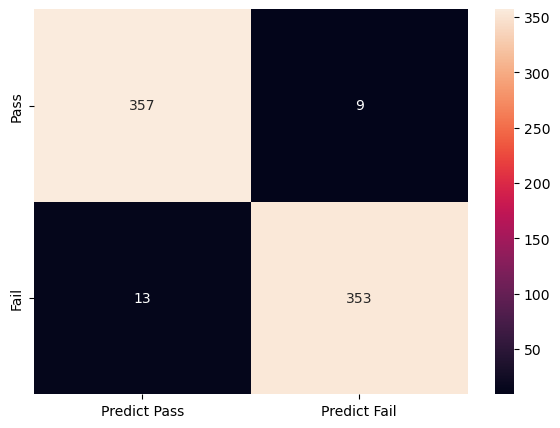

In [504]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_rf,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [505]:
# Saving the Random Forest with PCA results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_rf,y_test).ravel()

rf_train_accuracy = accuracy_score(y_hat_rf,y_train)
rf_test_accuracy = accuracy_score(y_pred_rf,y_test)
rf_recall = round(tp/(tp+fn), 3)  
rf_precision = round(tp/(tp+fp), 3)  
rf_specificity =round(tn/(tn+fp),3)    

result.loc[10] = ['Random Forest with PCA', rf_train_accuracy, rf_test_accuracy, 
                 rf_precision,rf_recall,rf_specificity, 1-rf_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.773017,0.780055,0.840,0.747,0.822,0.178
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181
6,SVM with PCA,0.989517,0.965847,1.000,0.935,1.000,0.000
7,Tuned SVM,1.000000,0.993169,0.989,0.997,0.989,0.011
8,KNN with PCA,0.810392,0.739071,1.000,0.655,1.000,0.000
9,Tuned KNN,1.000000,0.874317,1.000,0.797,1.000,0.000


In [506]:
#Hypertuning the Random Forest model with Grid Search
param_rf = {'n_estimators':[50,100,150,200], 'max_depth': [3,5,7,9],
             'max_features':[5,6,7,8,9,10]}

In [507]:
rf_tuned = GridSearchCV(RandomForestClassifier(random_state=1),param_rf,cv= 5)
rf_tuned.fit(X_scaled_train.loc[:, most_imp_cols], y_train)
print(rf_tuned.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=7, n_estimators=150,
                       random_state=1)


In [510]:
#Training with best estimators
rf_best= RandomForestClassifier(max_depth=9, max_features=7, n_estimators=150,random_state=1)
pipe_rf_best = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 41)), ('model', rf_best)])
pipe_rf_best.fit(X_train.loc[:, most_imp_cols],y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=41)),
                ('model',
                 RandomForestClassifier(max_depth=9, max_features=7,
                                        n_estimators=150, random_state=1))])

In [511]:
y_hat_rf_tuned= pipe_rf_best.predict(X_train.loc[:, most_imp_cols])
y_pred_rf_tuned= pipe_rf_best.predict(X_test.loc[:, most_imp_cols])
print ('Training Accuracy of Tuned Random Forest:', accuracy_score(y_hat_rf_tuned,y_train))
print ('Testing Accuracy of Tuned Random Forest:', accuracy_score(y_pred_rf_tuned,y_test))
print (classification_report(y_pred_rf_tuned,y_test))

Training Accuracy of Tuned Random Forest: 0.9690063810391978
Testing Accuracy of Tuned Random Forest: 0.924863387978142
              precision    recall  f1-score   support

          -1       0.88      0.97      0.92       333
           1       0.98      0.88      0.93       399

    accuracy                           0.92       732
   macro avg       0.93      0.93      0.92       732
weighted avg       0.93      0.92      0.93       732



<Figure size 1000x500 with 0 Axes>

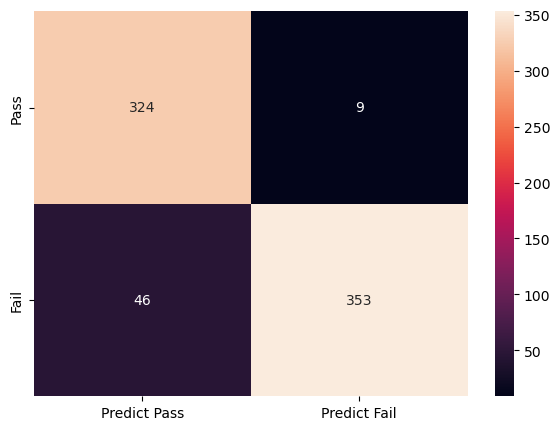

In [512]:
plt.figure(figsize=(10, 5))

cm=confusion_matrix(y_pred_rf_tuned,y_test, labels=[-1, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Pass","Fail"]],columns = [i for i in ["Predict Pass","Predict Fail"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


In [514]:
# Saving the Tuned Logistic Regression results in the dataframe
tn, fp, fn, tp = confusion_matrix(y_pred_rf_tuned,y_test).ravel()

rf_tuned_train_accuracy = accuracy_score(y_hat_rf_tuned,y_train)
rf_tuned_test_accuracy = accuracy_score(y_pred_rf_tuned,y_test)
rf_tuned_recall = round(tp/(tp+fn), 3)  
rf_tuned_precision = round(tp/(tp+fp), 3)  
rf_tuned_specificity =round(tn/(tn+fp),3)    

result.loc[11] = ['Tuned Random Forest', rf_tuned_train_accuracy, rf_tuned_test_accuracy, 
                 rf_tuned_precision,rf_tuned_recall,rf_tuned_specificity, 1-rf_tuned_specificity]
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall-True positive rate,Specificity-True negative rate,False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.773017,0.780055,0.840,0.747,0.822,0.178
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181
6,SVM with PCA,0.989517,0.965847,1.000,0.935,1.000,0.000
7,Tuned SVM,1.000000,0.993169,0.989,0.997,0.989,0.011
8,KNN with PCA,0.810392,0.739071,1.000,0.655,1.000,0.000
9,Tuned KNN,1.000000,0.874317,1.000,0.797,1.000,0.000


#### Q6. Post Training and Conclusion: [5 Marks]

A. Display and compare all the models designed with their train and test accuracies. [1 Marks]

B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]

C. Pickle the selected model for future use. [2 Marks]

D. Write your conclusion on the results. [1 Marks]

In [516]:
# Q6 A: Display and compare all the models designed with their train and test accuracies.
result.rename
result = result.rename(columns={'Recall-True positive rate': 'Recall (True positive rate)',
                                'Specificity-True negative rate': 'Specificity (True negative rate)'})

In [517]:
result

,Model,Training Accuracy,Testing Accuracy,Precision,Recall (True positive rate),Specificity (True negative rate),False positive rate
0,Decision Tree,1.000000,0.733607,0.692,0.831,0.638,0.362
1,Decision Tree with Grid Search CV,0.977666,0.863388,0.878,0.850,0.877,0.123
2,Decision Tree with Random Search CV,0.988605,0.814208,0.856,0.787,0.846,0.154
3,Decision Tree Grid Search with PCA,0.969918,0.833333,0.843,0.824,0.843,0.157
4,Logistic Regression with PCA,0.773017,0.780055,0.840,0.747,0.822,0.178
5,Tuned Logistic Regression,0.778943,0.782787,0.834,0.753,0.819,0.181
6,SVM with PCA,0.989517,0.965847,1.000,0.935,1.000,0.000
7,Tuned SVM,1.000000,0.993169,0.989,0.997,0.989,0.011
8,KNN with PCA,0.810392,0.739071,1.000,0.655,1.000,0.000
9,Tuned KNN,1.000000,0.874317,1.000,0.797,1.000,0.000


The above result shows the training accuracy, testing accuracy, Precision, recall, Specificity & False Positive rate for all the models tried.

In [518]:
# Q6 B: Select the final best trained model along with your detailed comments for selecting this model. 

I think 'Random Forest with PCA' is the best model as its not very complex as well as has good accuracy in testing set along with Recall, Precision etc.

The other good model is 'SVM with PCA' but has little less True Positive rate when compared to 'Random Forest with PCA'.

Both the models are performing quite decent.

'Tuned SVM' gives better result but due to tuning the model, its getting complex and computationaly more expensive and hence I would not suggest to use it when we have better ans simpler models.

In [529]:
# Q6 C: Pickle the selected model for future use.

Pickle is the standard way of serializing objects in Python. 

We can use the pickle operation to serialize our machine learning algorithms and save the serialized format to a file for later use.

Later we can load this file to deserialize our model and use it to make new predictions.

In [531]:
#Saving the model for future use
filename = 'finalized_model.sav'
pickle.dump(pipe_rf, open(filename, 'wb'))

In [532]:
# load the model from disk to check if it was saved properly and if its giving the same result
loaded_model = pickle.load(open(filename, 'rb'))
score = loaded_model.score(X_test.loc[:, most_imp_cols], y_test)
print(score)

0.9699453551912568


We can see that its giving the same test accuracy as 96.9% as it was previously.

In [ ]:
# Q6 D: Write your conclusion on the results.

Overall, I think the model I choose (Random Forest with PCA) is the one which is not too simple that its underfitting and nor too complex that its overfitting. 

While choosing the correct model, we need to be careful of the its complexity & time consumption.

In our use case, we already had too many features and comparitively less rows, it can easily cause Curse of Dimensionality, hence we removed very high collinear features and later reduce the dimensionality using PCA.

We could have done PCA in the start also so that we could have got rid of many features in the start but its upto us how we want to go ahead. PCA helps to not let loose important information and just remove noise.

Thus, at the end we had 41 independent features and the model 'Random Forest with PCA' was not a very complex model which actually gave quite good results compared to other models. 

The other model which i found was good is 'SVM with PCA', this also performed well and this is also not very complex model.